# Computer Vision: Detecting Lane Lines for Autonomous Vehicles
***

## Objective

In this lab, you use OpenCV images transformations to isolate and detect road lanes. We encourage you to test all of the transformation in this lab and to explore writing you own. We will demonstrate the Python bindings that enable scripted access to powerful, optimized computer vision algorithms that are easy to use as typing in a digital notebook yet optimized for image and video processing on Intel silicon.

The following techniques are used:

- Color Selection
- Canny Edge Detection
- Region of Interest Selection
- Hough Transform Line Detection



## Cleaning Test Data

The first step is to prrepare the data. The test images are located in a directory named test_image. Images in this directory should be JPGs with the same dimensions. The road lines that we search for are yellow or white and they should be in the area of interest defined later in the lab.

You can add your own to the test_image/ directory.

## Import the Python Libraries for Numerical and Image Processing

In [312]:
# Python libraries to load files
import os, glob

# OpenCV libraries
import cv2

# Import the libraries for plotting
import matplotlib.pyplot as plt

# Import numeric libraries
import numpy as np

# Import libraries for video processing
from moviepy.editor import VideoFileClip

# Matplot should be rendered in this notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Displaying a single image in OpenCV

In OpenCV a single image can be displayed with the imshow function

In [313]:
def show_images(images, cmap=None):
    # Use two columns to display images
    cols = 2
    ## Use flooring divison to remove the remainder
    rows = (len(images)+1)//cols
    
    plt.figure(figsize=(15, 13))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
    plt.tight_layout(pad=2, h_pad=2, w_pad=2)
    plt.show()

Now display the images.

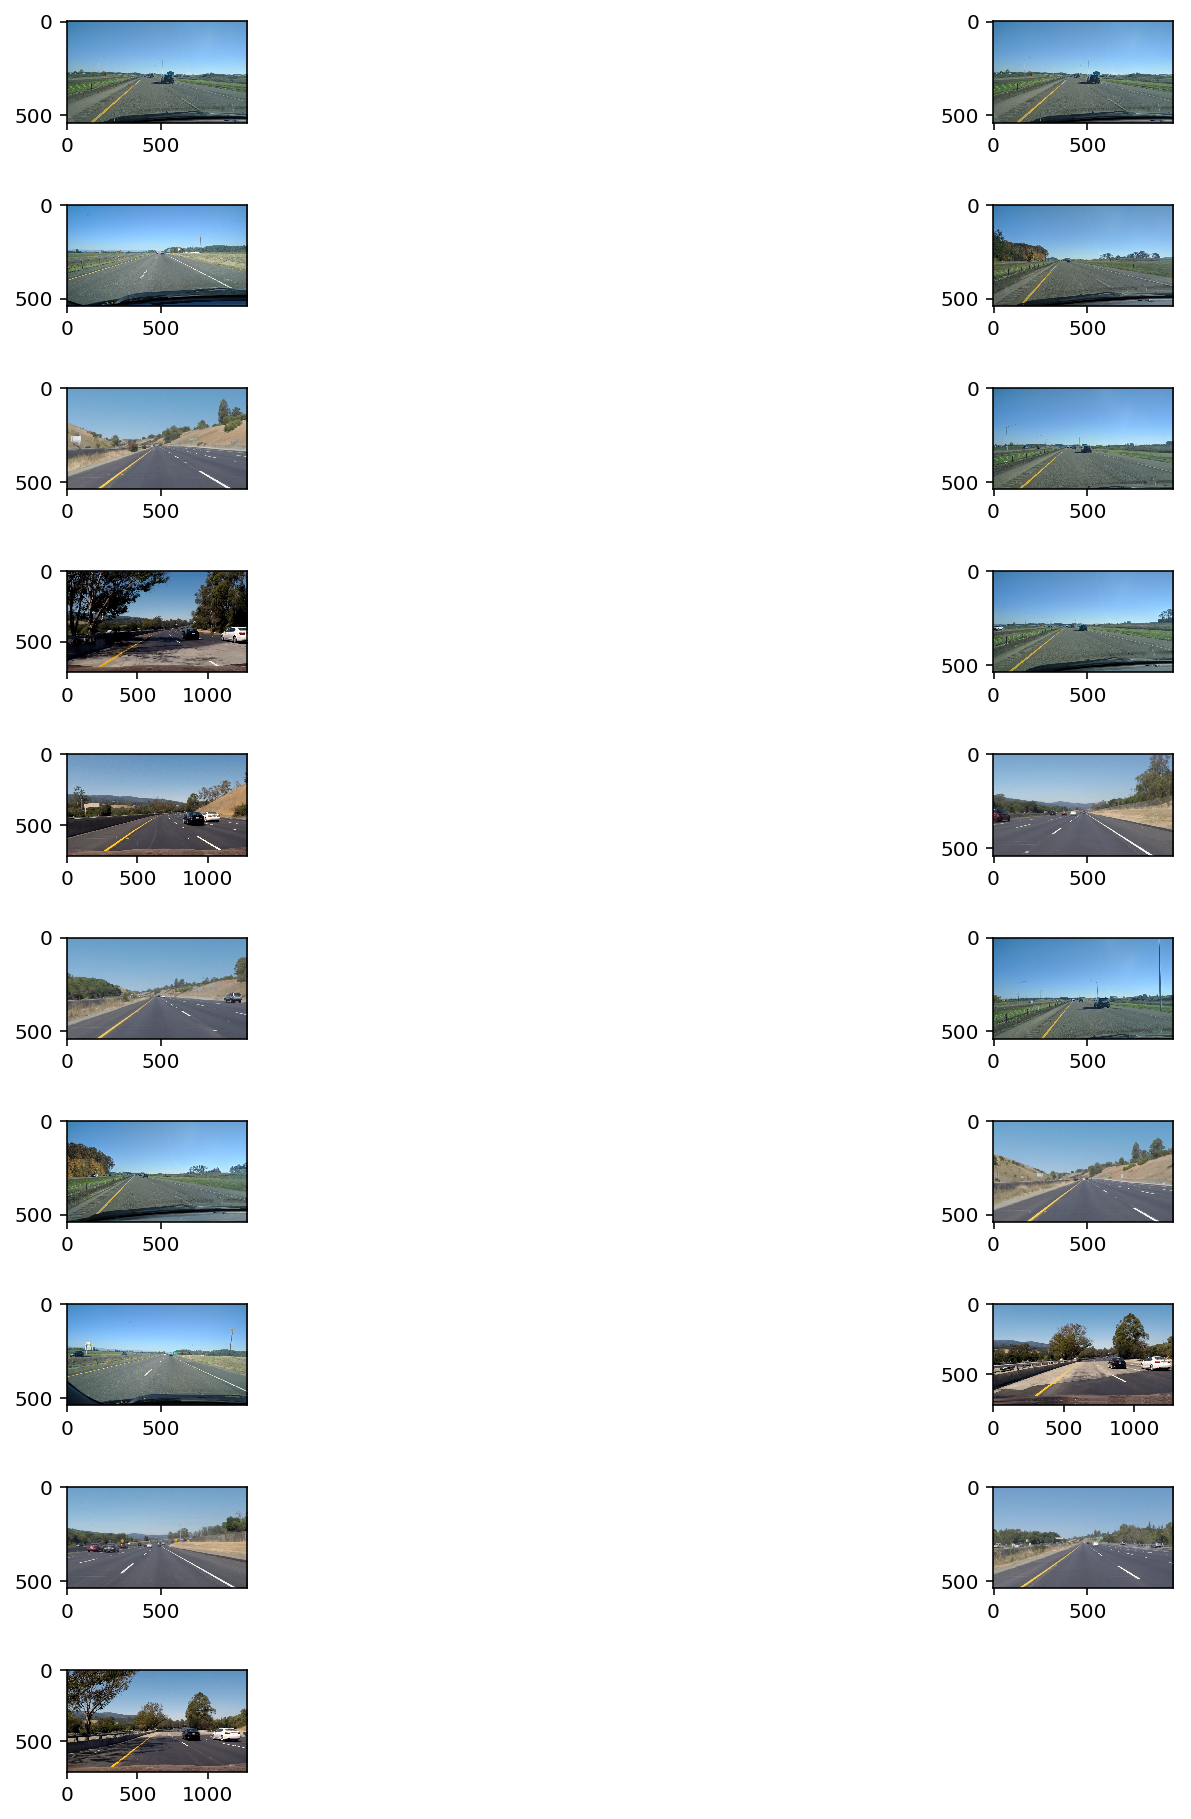

In [314]:
test_images = [plt.imread(path) for path in glob.glob('test_images/*.jpg')]
show_images(test_images)

## Color Spaces in OpenCV

There are more than 150 color-space conversion methods available in OpenCV. They can be use to surface features that you want to detect.

The color conversion function cv2.cvtColor(input_image, flag) bdetermines the type of conversion.

For BGR → Gray conversion we use the flags cv2.COLOR_BGR2GRAY. Similarly for BGR → HSV, we use the flag cv2.COLOR_BGR2HSV. To get other flags, just run following commands in your Python terminal :

The images are loaded in RGB color space.  Let's try selecting only yellow and white colors in the images using the RGB channels.

If you'd like to see the color other available color spaces then run this code to print a list.


In [315]:
# Import the Pretty Print Module
from pprint import pprint
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
pprint(flags)

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_EA',
 'COLOR_BAYER_GR2BGR_VNG',
 'COLOR_BAYER_GR2GRAY',
 'COLOR_BAYER_GR2RGB',
 'COLOR_BAYER_GR2RGBA',
 'COLOR_BAYER_GR2RGB_EA',
 'COLOR_BAYER_GR2RGB_VNG',
 'COLOR_BAYER_RG2BGR',
 'COLOR_BAYER_RG2BGRA',
 'COLOR_BAYER_RG2BGR_EA',
 'COLOR_BAYER_RG2BGR_VNG',
 'COLOR_BAYER_RG2GRAY',
 'COLOR_BAYER_RG2RGB',
 'COLOR_BAYER_RG2RGBA',
 'COLOR_BAYER_RG2RGB_EA',
 'COLOR_BAYER_RG2RGB_VNG',
 'COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLO

### HSL and HSV Color Space

Using `cv2.cvtColor`, we can convert RGB image into different color space.  For example, [HSL and HSV color space](https://en.wikipedia.org/wiki/HSL_and_HSV).

<img src='images/colorspaces.png' width='100%'>

### HSV Color Space

Here is an explaination from Wikipedia of why the HSV color space is of importance to computer vision application.

> HSL, HSV, HSI, or related models are often used in computer vision and image analysis for feature detection or image segmentation. The applications of such tools include object detection, for instance in robot vision; object recognition, for instance of faces, text, or license plates; content-based image retrieval; and analysis of medical images.

> For the most part, computer vision algorithms used on color images are straightforward extensions to algorithms designed for grayscale images, for instance k-means or fuzzy clustering of pixel colors, or canny edge detection. At the simplest, each color component is separately passed through the same algorithm. It is important, therefore, that the features of interest can be distinguished in the color dimensions used. Because the R, G, and B components of an object’s color in a digital image are all correlated with the amount of light hitting the object, and therefore with each other, image descriptions in terms of those components make object discrimination difficult. Descriptions in terms of hue/lightness/chroma or hue/lightness/saturation are often more relevant.

 > Starting in the late 1970s, transformations like HSV or HSI were used as a compromise between effectiveness for segmentation and computational complexity. They can be thought of as similar in approach and intent to the neural processing used by human color vision, without agreeing in particulars: if the goal is object detection, roughly separating hue, lightness, and chroma or saturation is effective, but there is no particular reason to strictly mimic human color response. John Kender’s 1976 master’s thesis proposed the HSI model. Ohta et al. (1980) instead used a model made up of dimensions similar to those we have called I, α, and β. In recent years, such models have continued to see wide use, as their performance compares favorably with more complex models, and their computational simplicity remains compelling.

Source https://en.wikipedia.org/wiki/HSL_and_HSV#Use_in_image_analysis

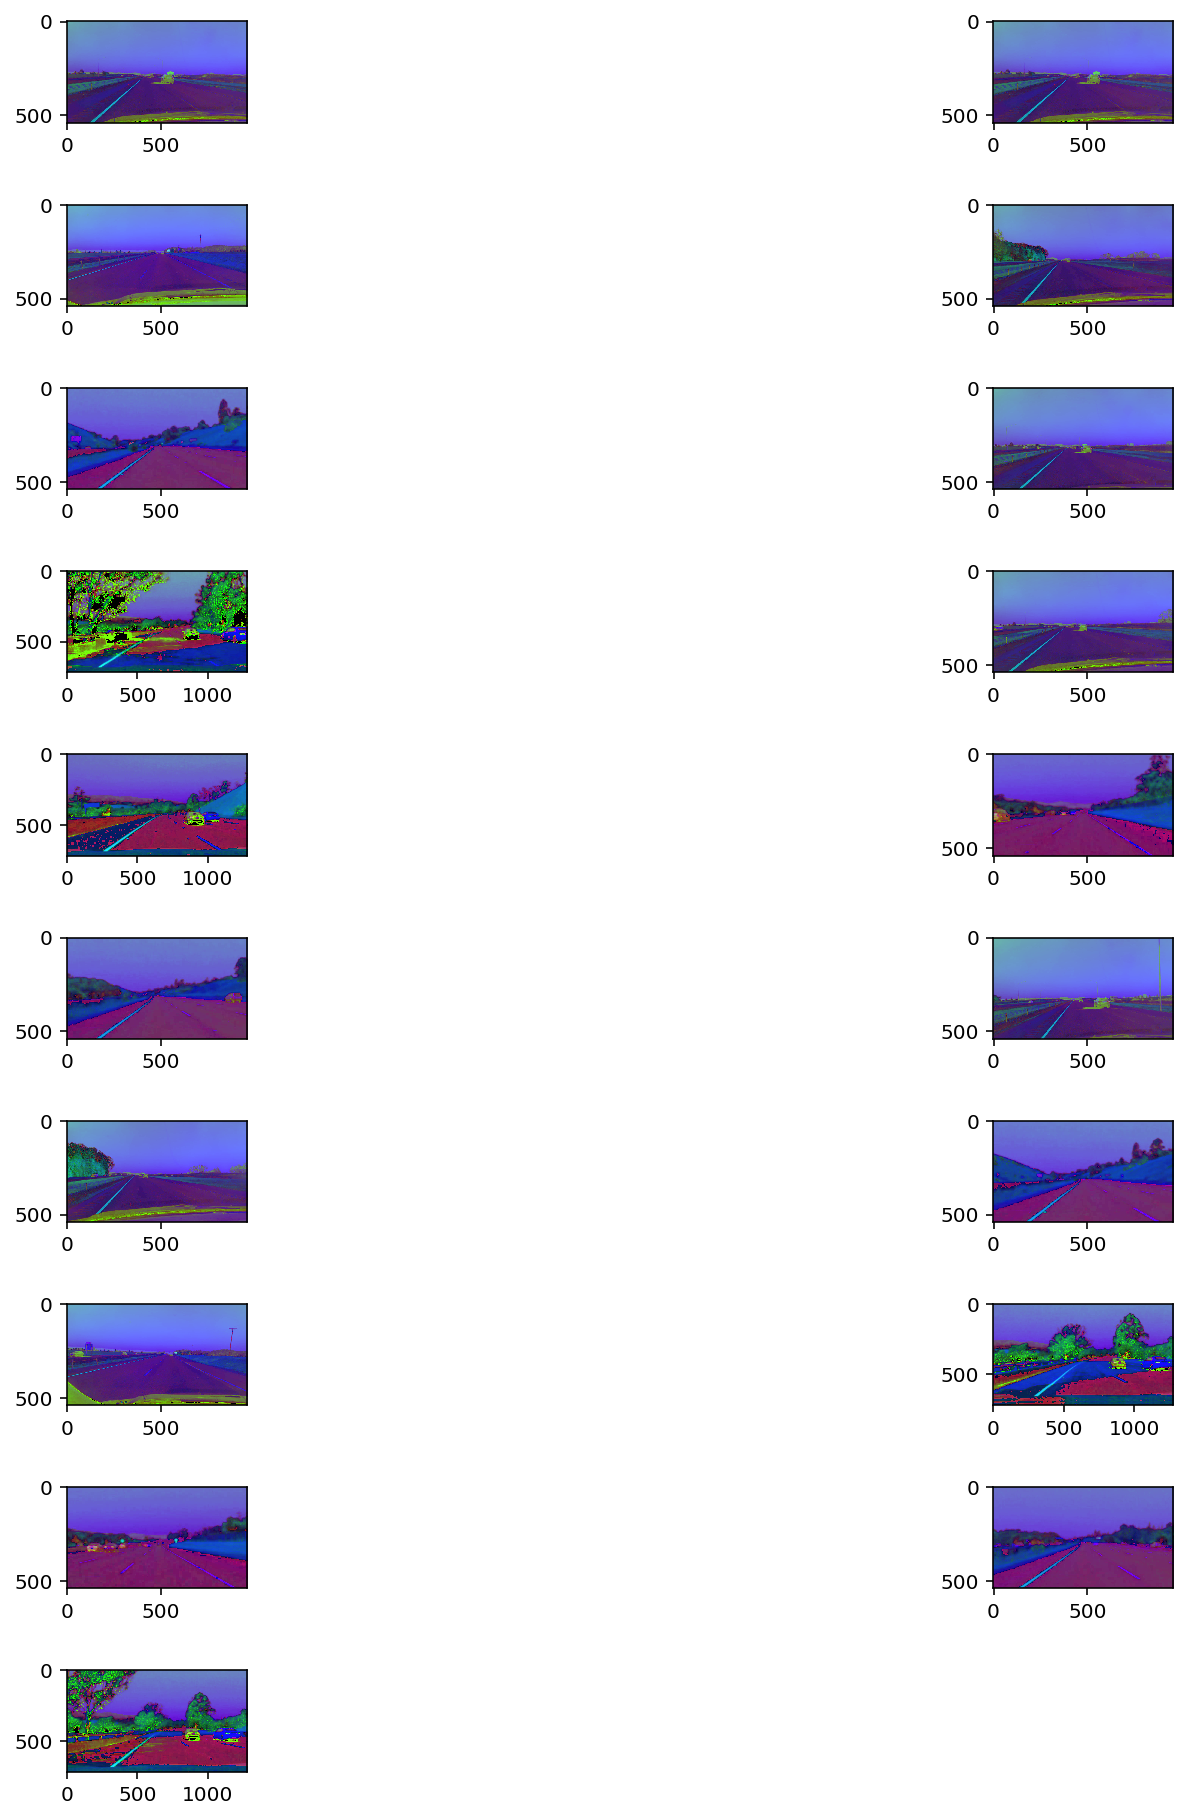

In [316]:
def convert_hsv(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HSV) # Change this enum (cv2.*) to view other color spaces

show_images(list(map(convert_hsv, test_images)))

The yellow lines are clear, but the white lines are nearly gone.

### HSL Color Space

Let view these images in the HLS color space.

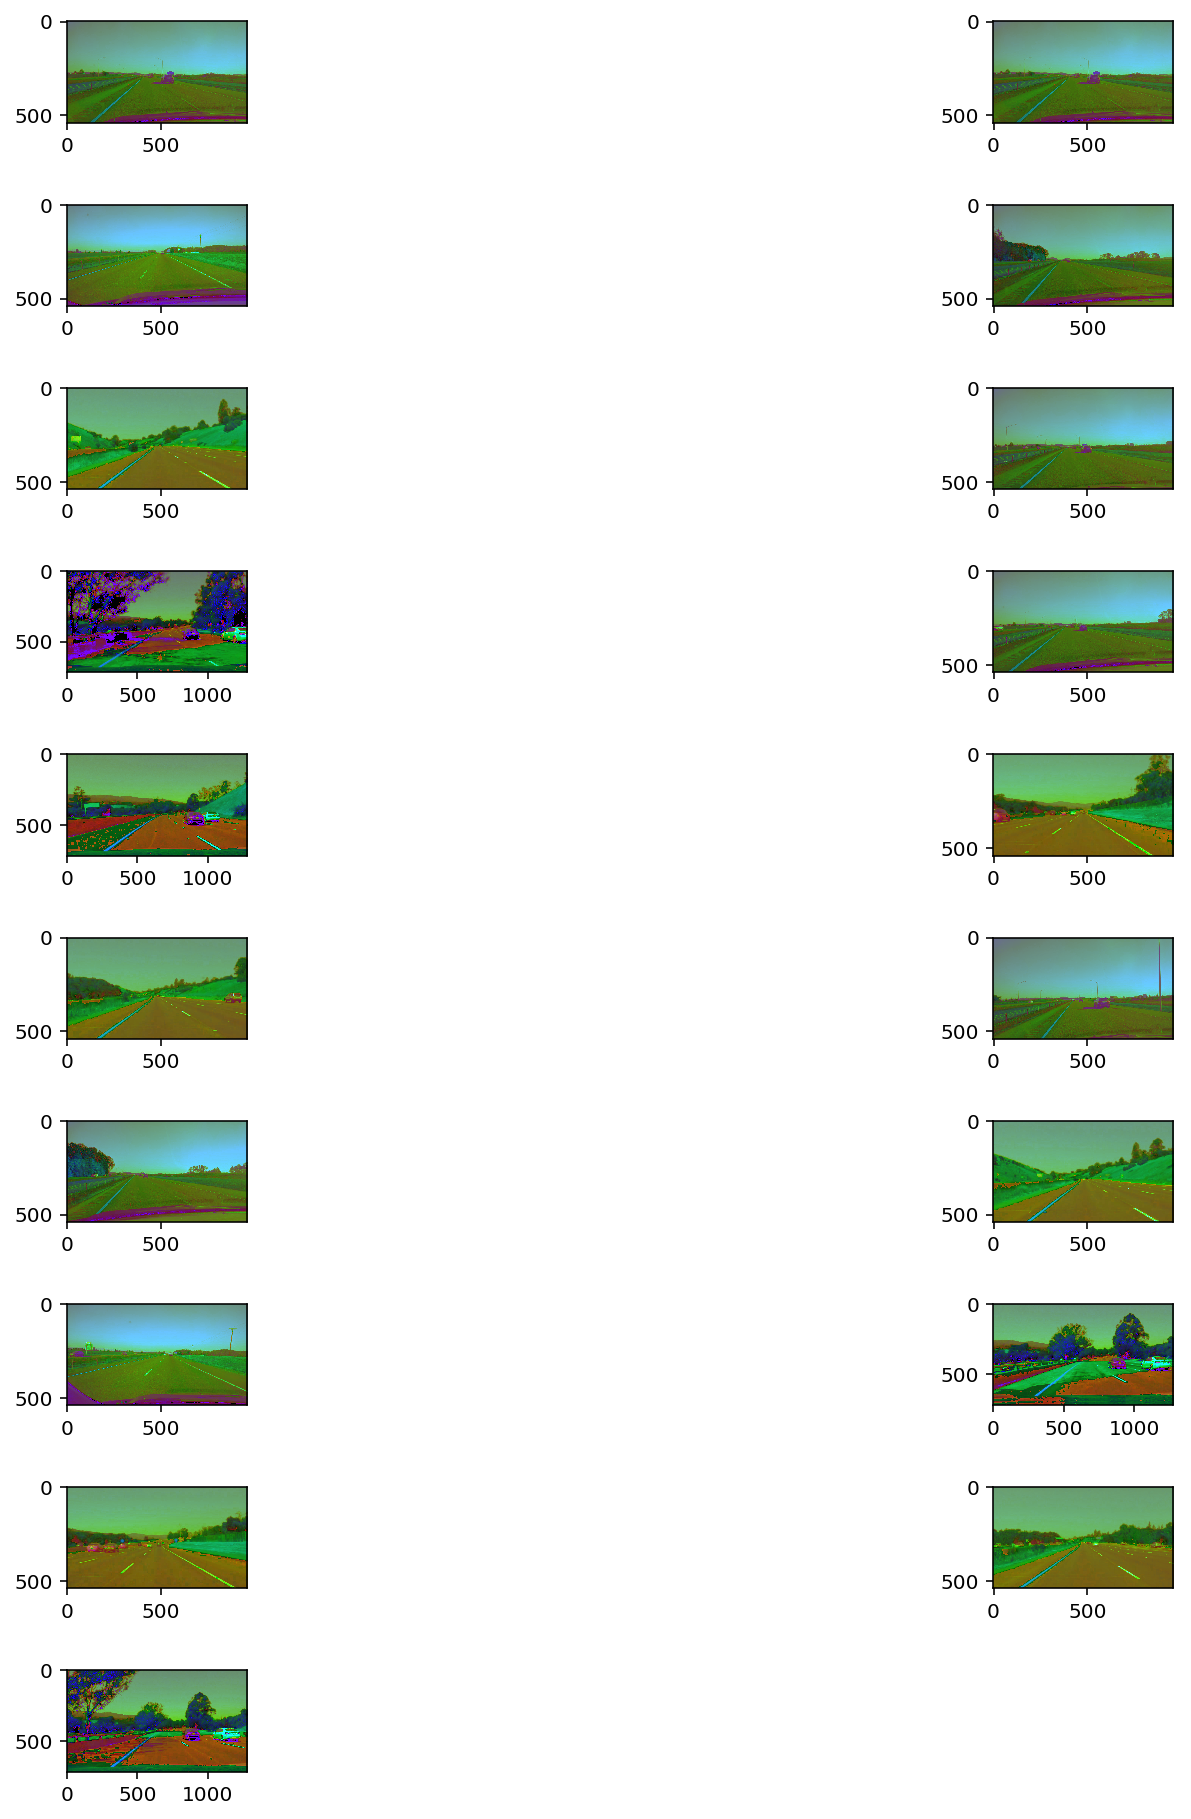

In [317]:
def convert_hls(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

show_images(list(map(convert_hls, test_images)))

Continue to try different color spaces. Remember that we printed a list of all color space above.

## Using Color Masks

Instead of using alternative color spaces to ioslate the lanes, let's build a filter to select those white and yellow lines.

- Use [cv2.inRange](http://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#inrange) to filter the white color and the yellow color seperately.  The cv2.inRange function will filter all color value in an image between the lower and upper bounds. The bounds are tuples which represent a color in the color space.

  
- Use [cv2.bitwise_or](http://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#bitwise-or) to combine these two binary masks.  
  The combined mask returns 255 when either white or yellow color is detected.
  
  
- Use [cv2.bitwise_and](http://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#bitwise-and) to apply the combined mask onto the original RGB image

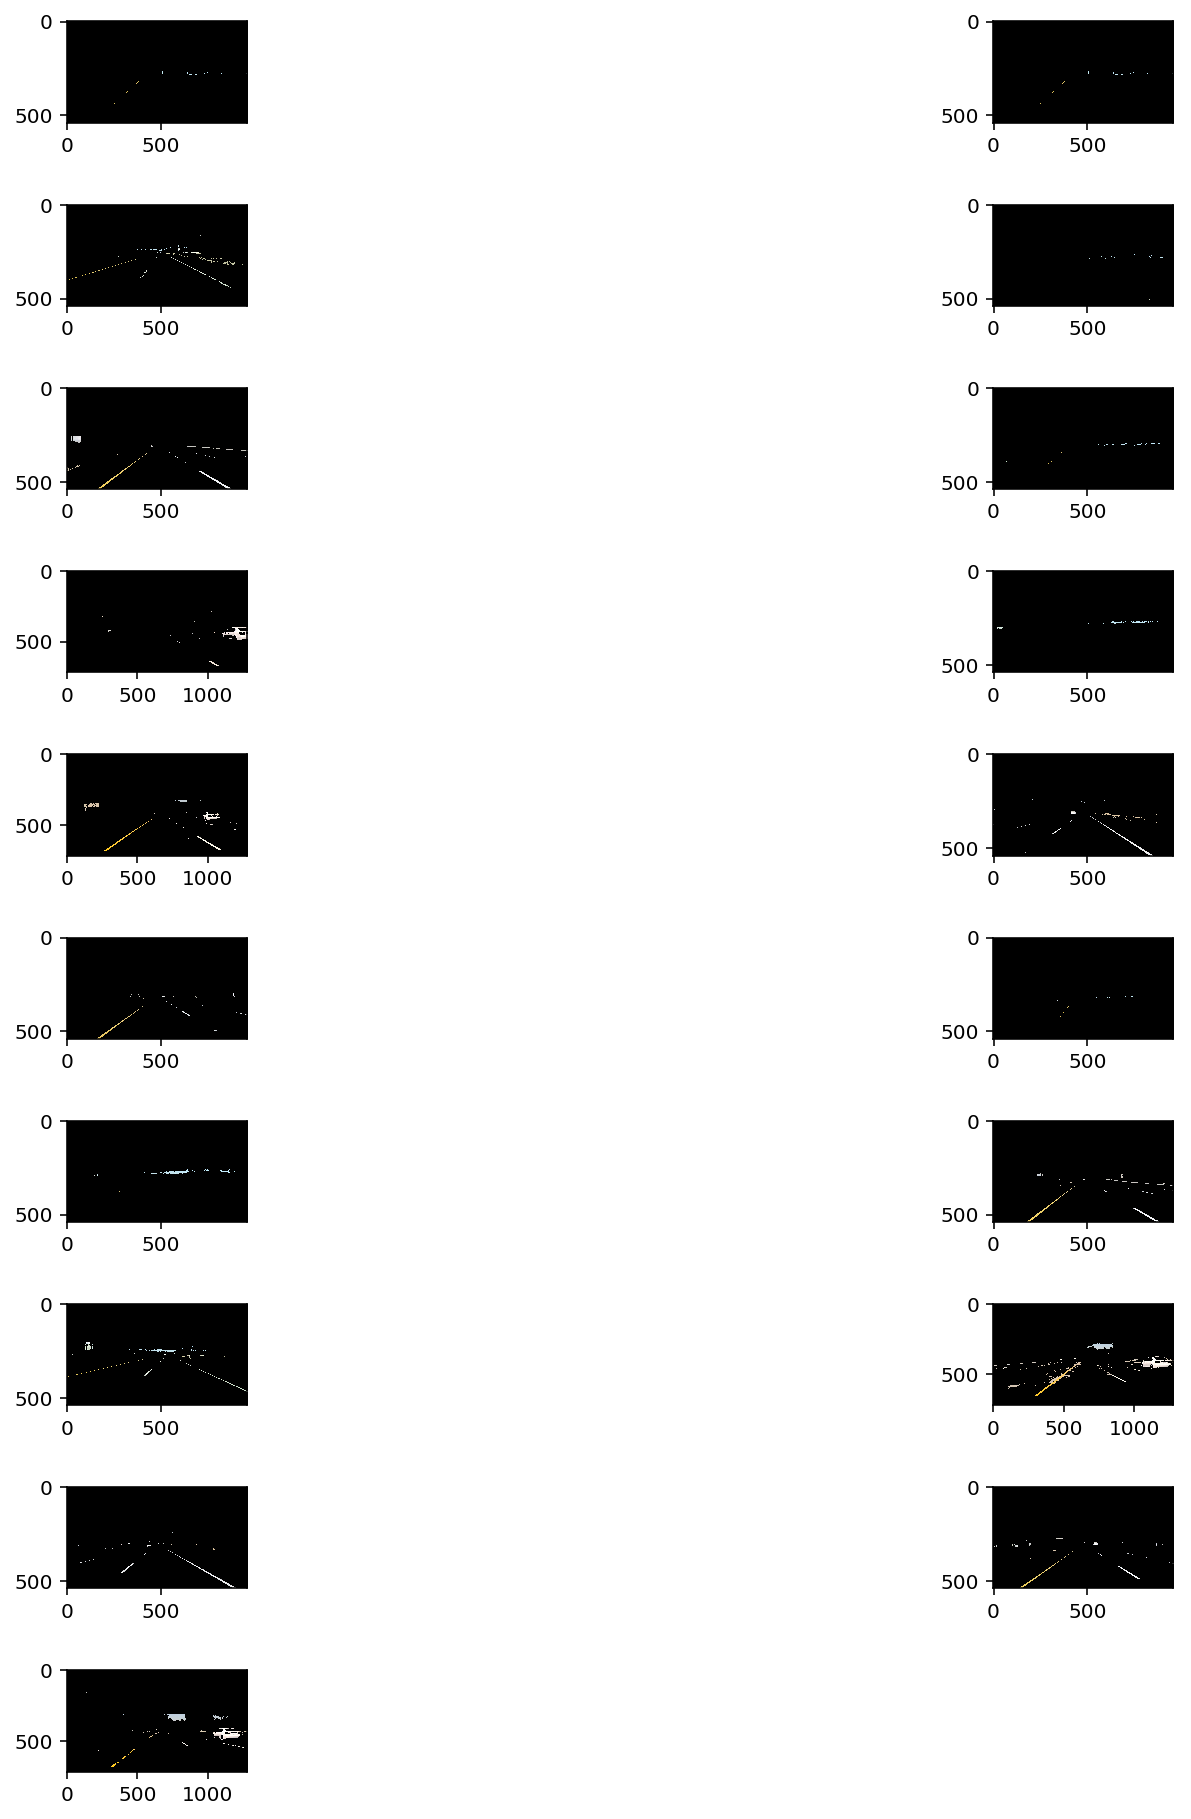

In [318]:
def select_rgb_white_yellow(image): 
    # white color mask
    lower = np.uint8([200, 200, 200])
    upper = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(image, lower, upper) 
    
    # yellow color mask
    lower = np.uint8([190, 190,   0])
    upper = np.uint8([255, 255, 255])
    yellow_mask = cv2.inRange(image, lower, upper)
    
    # combine the mask
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked = cv2.bitwise_and(image, image, mask = mask)
    return masked

show_images(list(map(select_rgb_white_yellow, test_images)))

These results are not too poor. However to become more specific we will need to define the region with these photos that is "of interest."

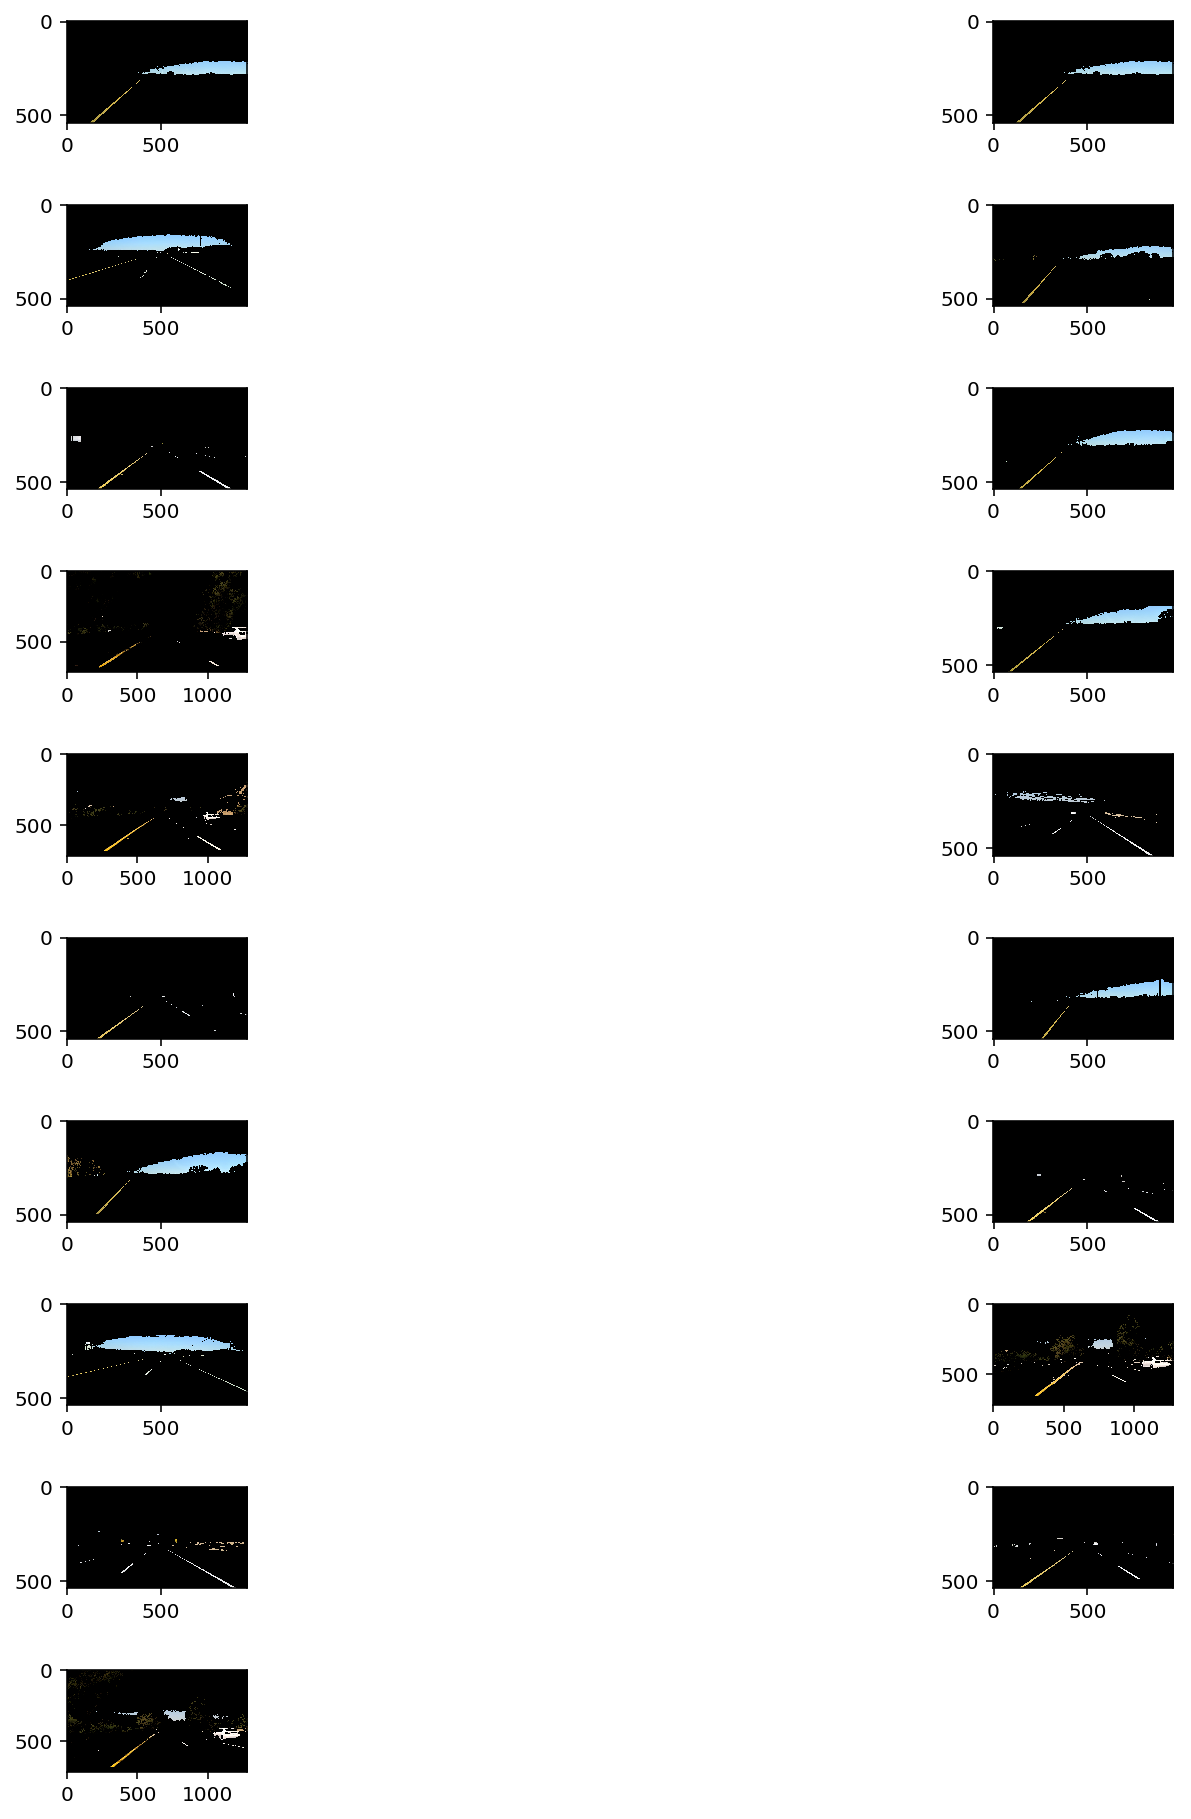

In [319]:
def select_white_yellow(image):
    converted = convert_hls(image)
    # white color mask
    lower = np.uint8([  0, 200,   0])
    upper = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(converted, lower, upper)
    # yellow color mask
    lower = np.uint8([ 10,   0, 100])
    upper = np.uint8([ 40, 255, 255])
    yellow_mask = cv2.inRange(converted, lower, upper)
    # combine the mask
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    return cv2.bitwise_and(image, image, mask = mask)

white_yellow_images = list(map(select_white_yellow, test_images))

show_images(white_yellow_images)

## Edge Detection

Edge Detection is important in many object recognition techniques, including finding road lines, paths in a warehouse or object on an assembly line.

Then we will talk about the Canny Edge Detection process. Canny edge detection is a technique to extract useful structural information from images or video. It also will allow the object to be represented while dramatically reducing the amount of data needed.

The [Canny edge detector](https://en.wikipedia.org/wiki/Canny_edge_detector) has the following goals according to Wikipedia.

> - Detection of edge with low error rate, which means that the detection should accurately catch as many edges shown in the image as possible. The edge point detected from the operator should accurately localize on the center of the edge.
> - A given edge in the image should only be marked once, and where possible, image noise should not create false edges.

As we've discussed, it does this via the following steps:

##### Noise Reduction

We will use the use of the Gauissan Blurring filter.

##### Finding Intensity Gradient of the Image

We will use the SobelX, SobelY and Laplacian gradient filters.

##### Non-maximum Suppression

We'll use the cv2.canny() function to suppress pixels that are not on a gradient maximum. 

##### Hysteresis Thresholding

This step selects from the pixels that are left in the image to determine if the intesity gradient changes quickly enough to be selected for the final image.  For this step you will need to specify two threshold values, a lower and an upper threshold. You can changes these parameters to bring out different levels of intesity gradients.

#### Reference

- [Canny Edge Detection OpenCV Theory](http://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html)
- [cv2.Canny OpenCV API Reference](http://docs.opencv.org/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html)
- use [cv2.cvtColor](http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor) to convert images into gray scale
- use [cv2.GaussianBlur](http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#gaussianblur) to smooth out rough edges 
- use [cv2.Canny](http://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=canny) to find edges


### Example of Edge Detection

This is an example to give you an idea of what an edge detecting algorithm will generate from an image. Our goal is to use edge detection to find the road lanes in an image.

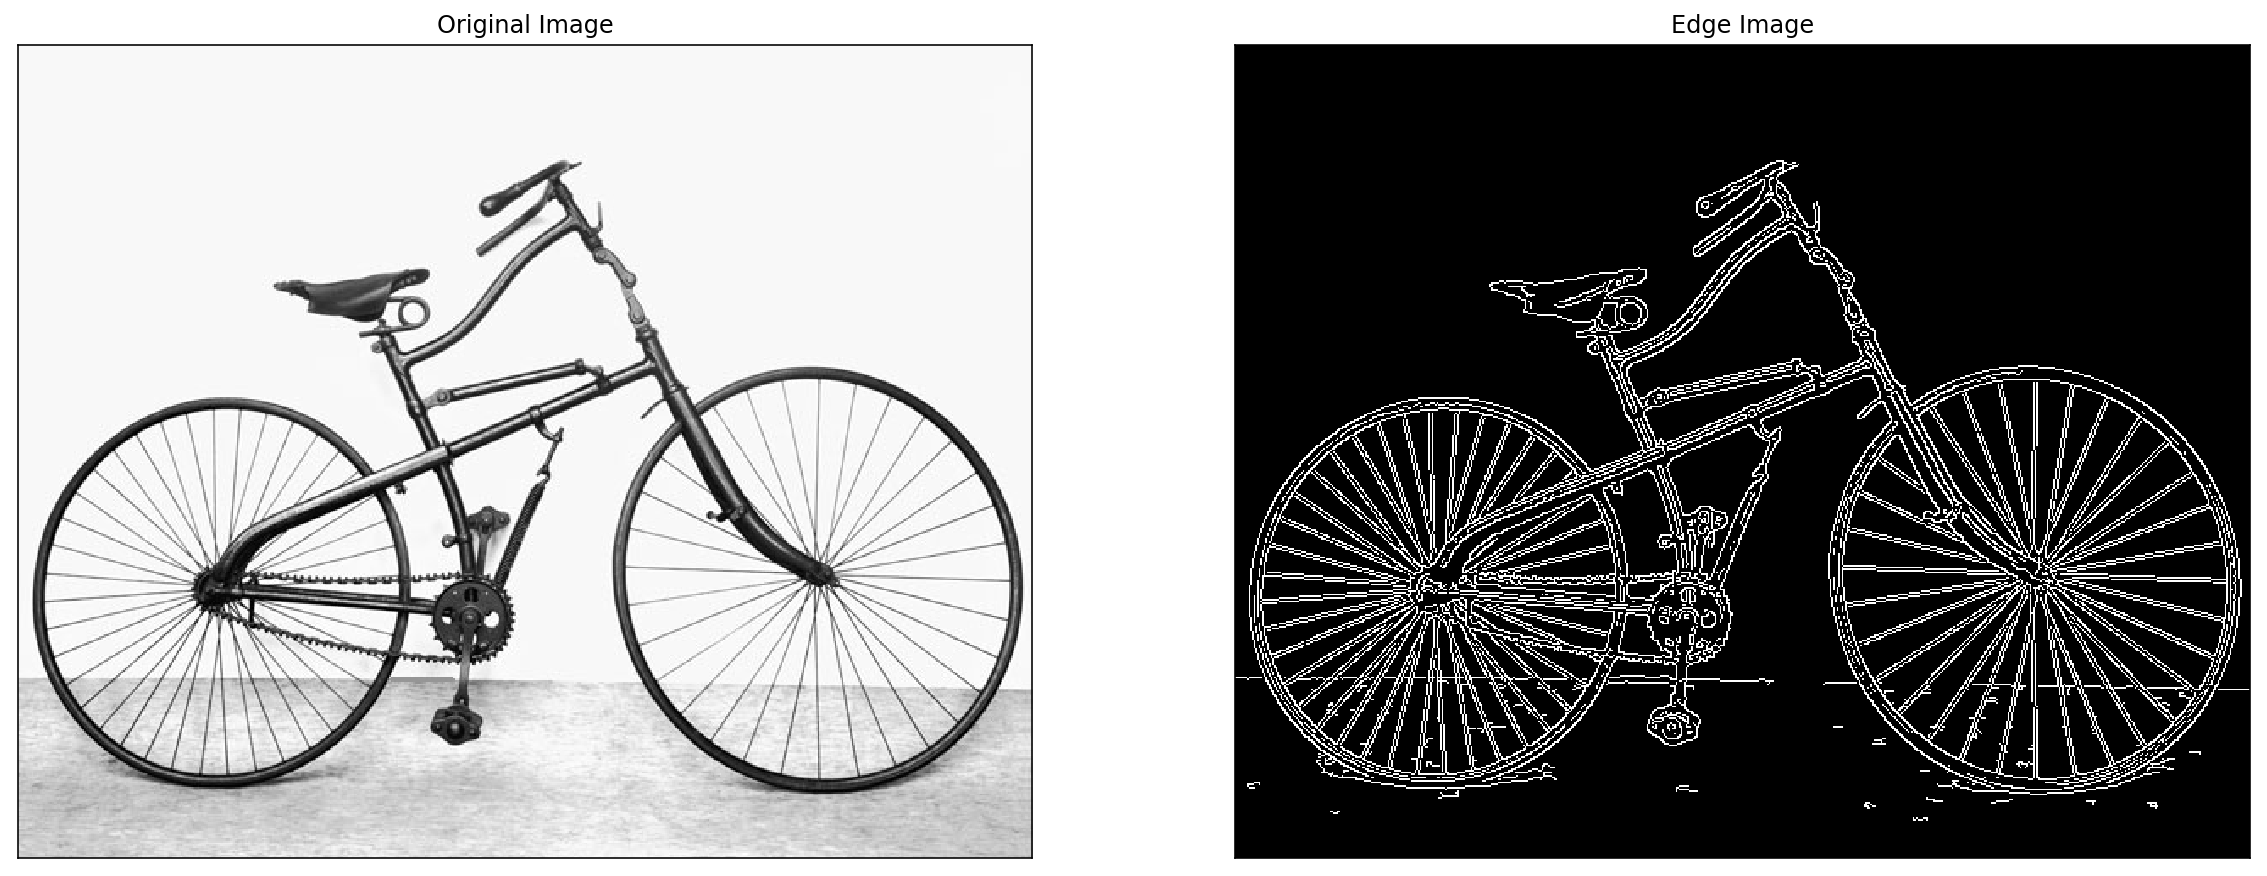

In [320]:
img = cv2.imread('images/bicycle.jpg',0)
edges = cv2.Canny(img,100,200)

plt.figure(figsize=(20, 10))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### Edge Detction Preparation: Gray Scaling

The images should be converted into gray scaled to remove color information from the images. Canny Edge Detection functions by using the intensity of the pixel values rather than color.

Let's write a function to apply gray scaling to the images that are filtered for white and yellow.

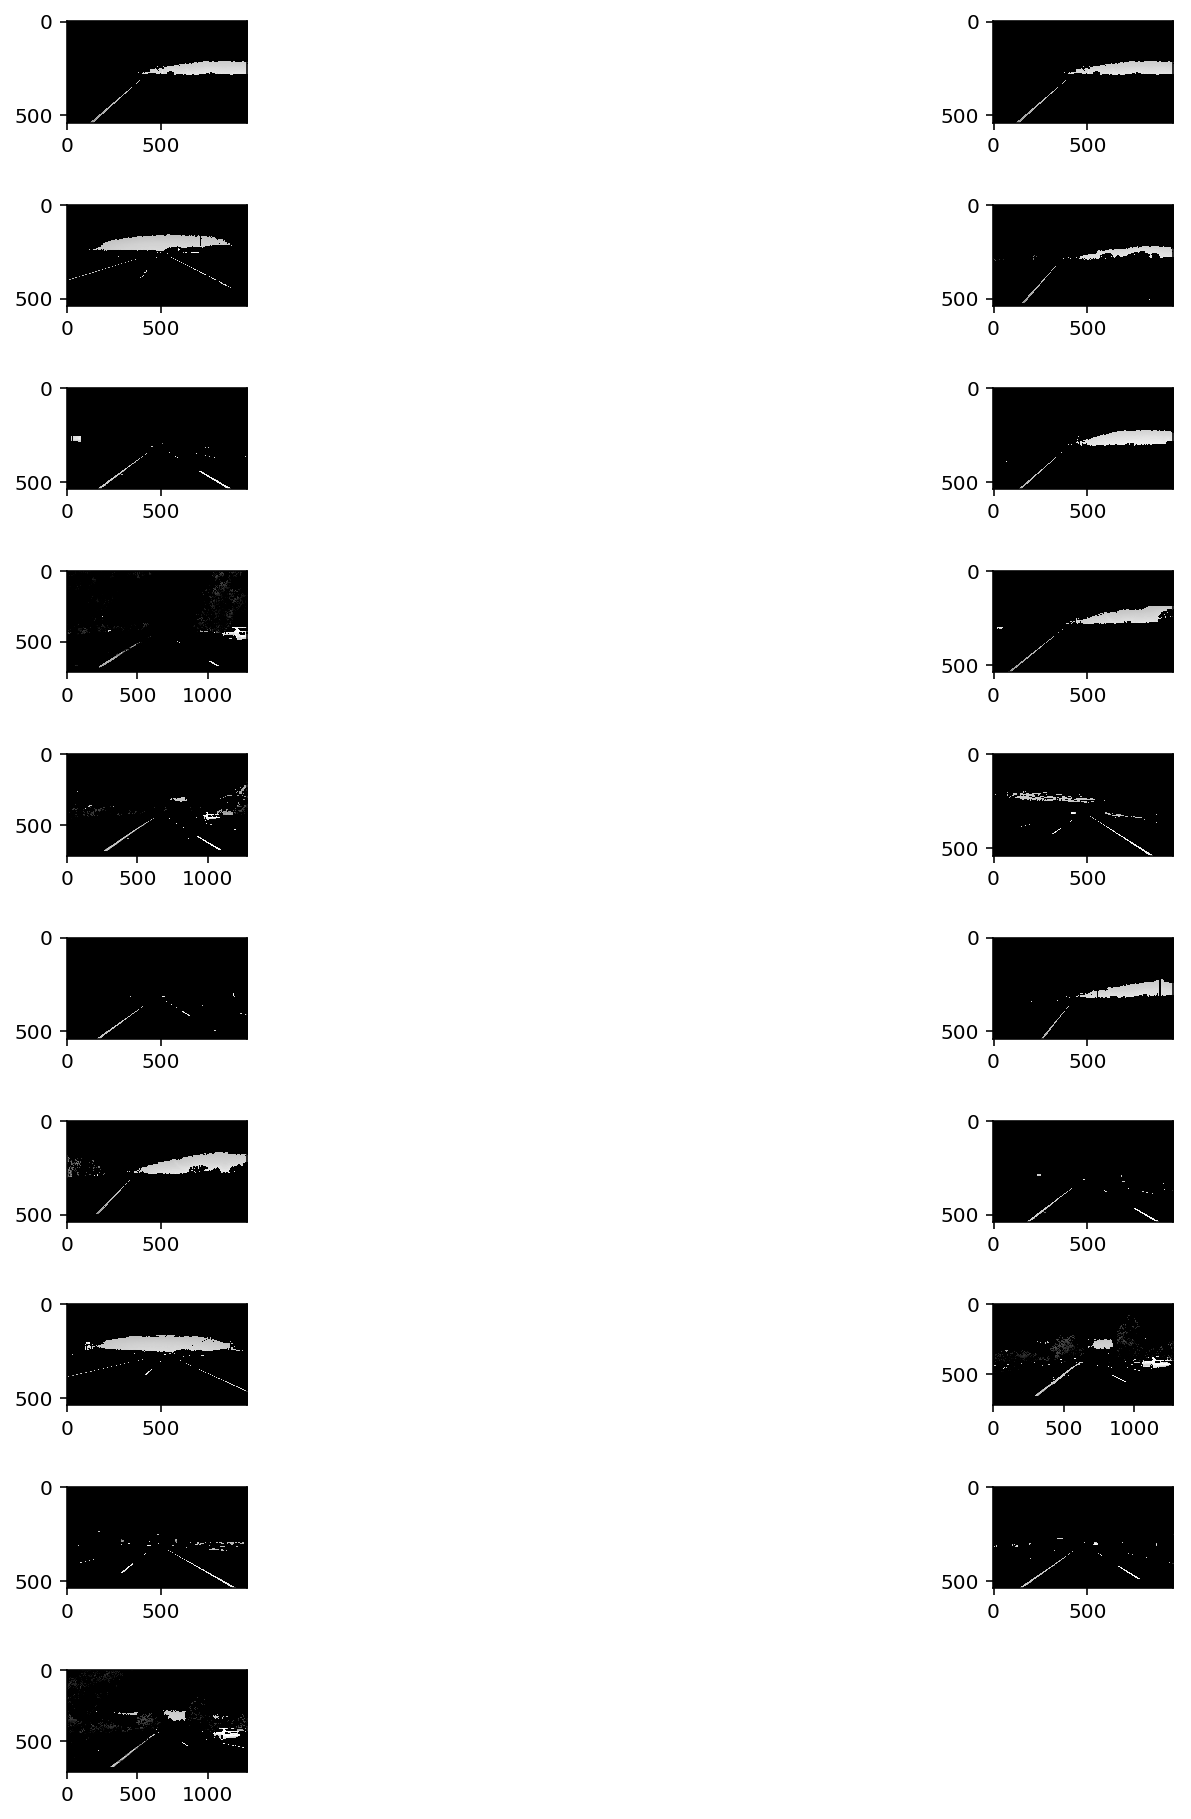

In [321]:
# Use the cvtColor function to open the images as grayscale
def convert_gray_scale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


gray_images = list(map(convert_gray_scale, white_yellow_images))

show_images(gray_images)

### Edge Detction Preparation: Smoothing

<img src='images/smoothing.png' width='100%'>

There are many techniques for smoothing. The Gaussian Blur is common and widely available way to accomplish smoothing.

Detecting an edge is done by looking at intensity gradient directions and understanding that is always perpendicular to edges. We can then choose one of four angles representing vertical, horizontal and two diagonal directions, assuming the kernel being operated on is a square set of pixels.

The blur operations will reduce the number of abrupt transitions and thereby reduce the noise. 

- Use [cv2.GaussianBlur](http://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#gaussianblur) to smooth out edges.

- [Gaussian Filter OpenCV Quick Explanation](http://docs.opencv.org/doc/tutorials/imgproc/gausian_median_blur_bilateral_filter/gausian_median_blur_bilateral_filter.html#gaussian-filter)

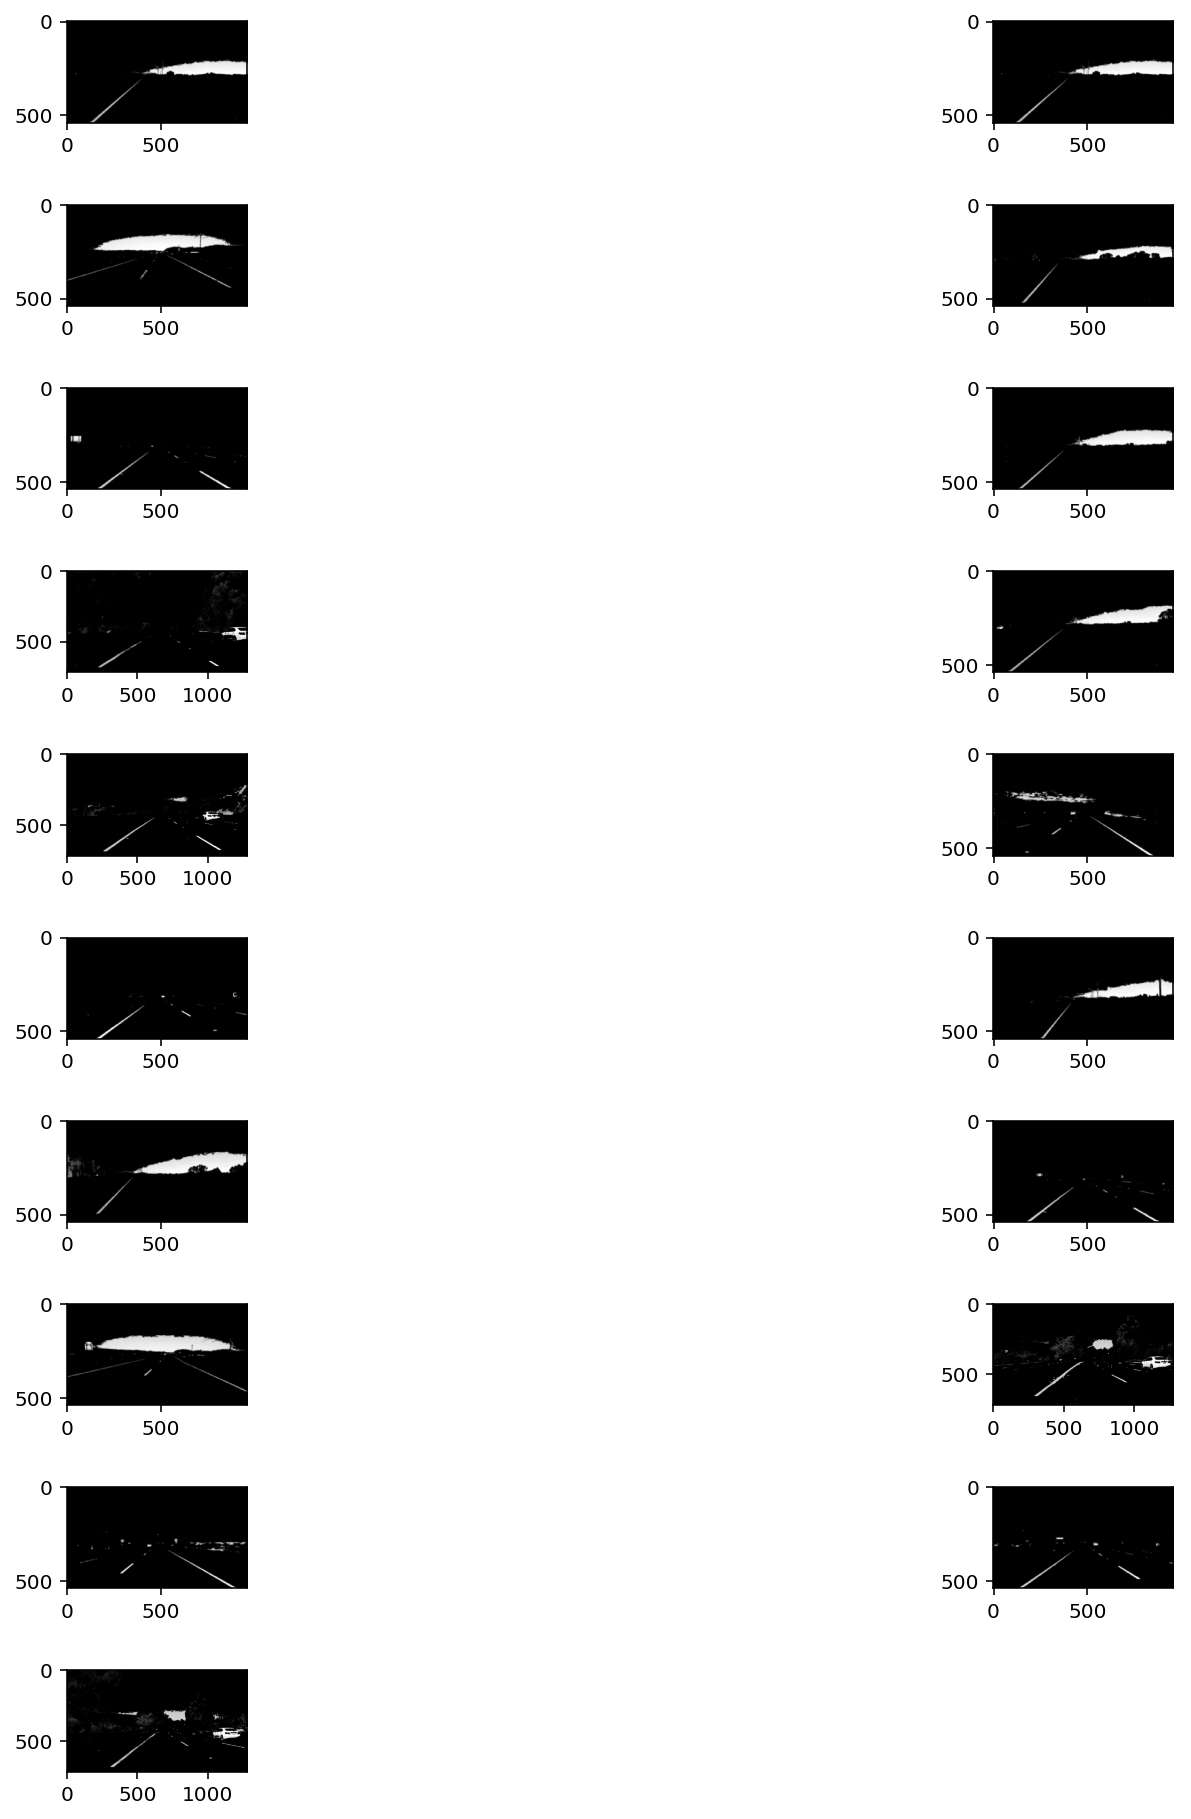

In [322]:
# The kernel size must be an odd and positive number
def apply_smoothing(image, kernel_size=15):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# Functional programming
blurred_images = list(
    map(
        lambda image: apply_smoothing(image),
        gray_images))
show_images(blurred_images)

### Edge Detection: Gradients

Now we will move from preparing the work to the operations of canny edge detection itself.

The first concept to understand is gradients filters. OpenCV provides many different type of gradient filters and they can be applied in different ways.

<img src="images/gradients.png"/>


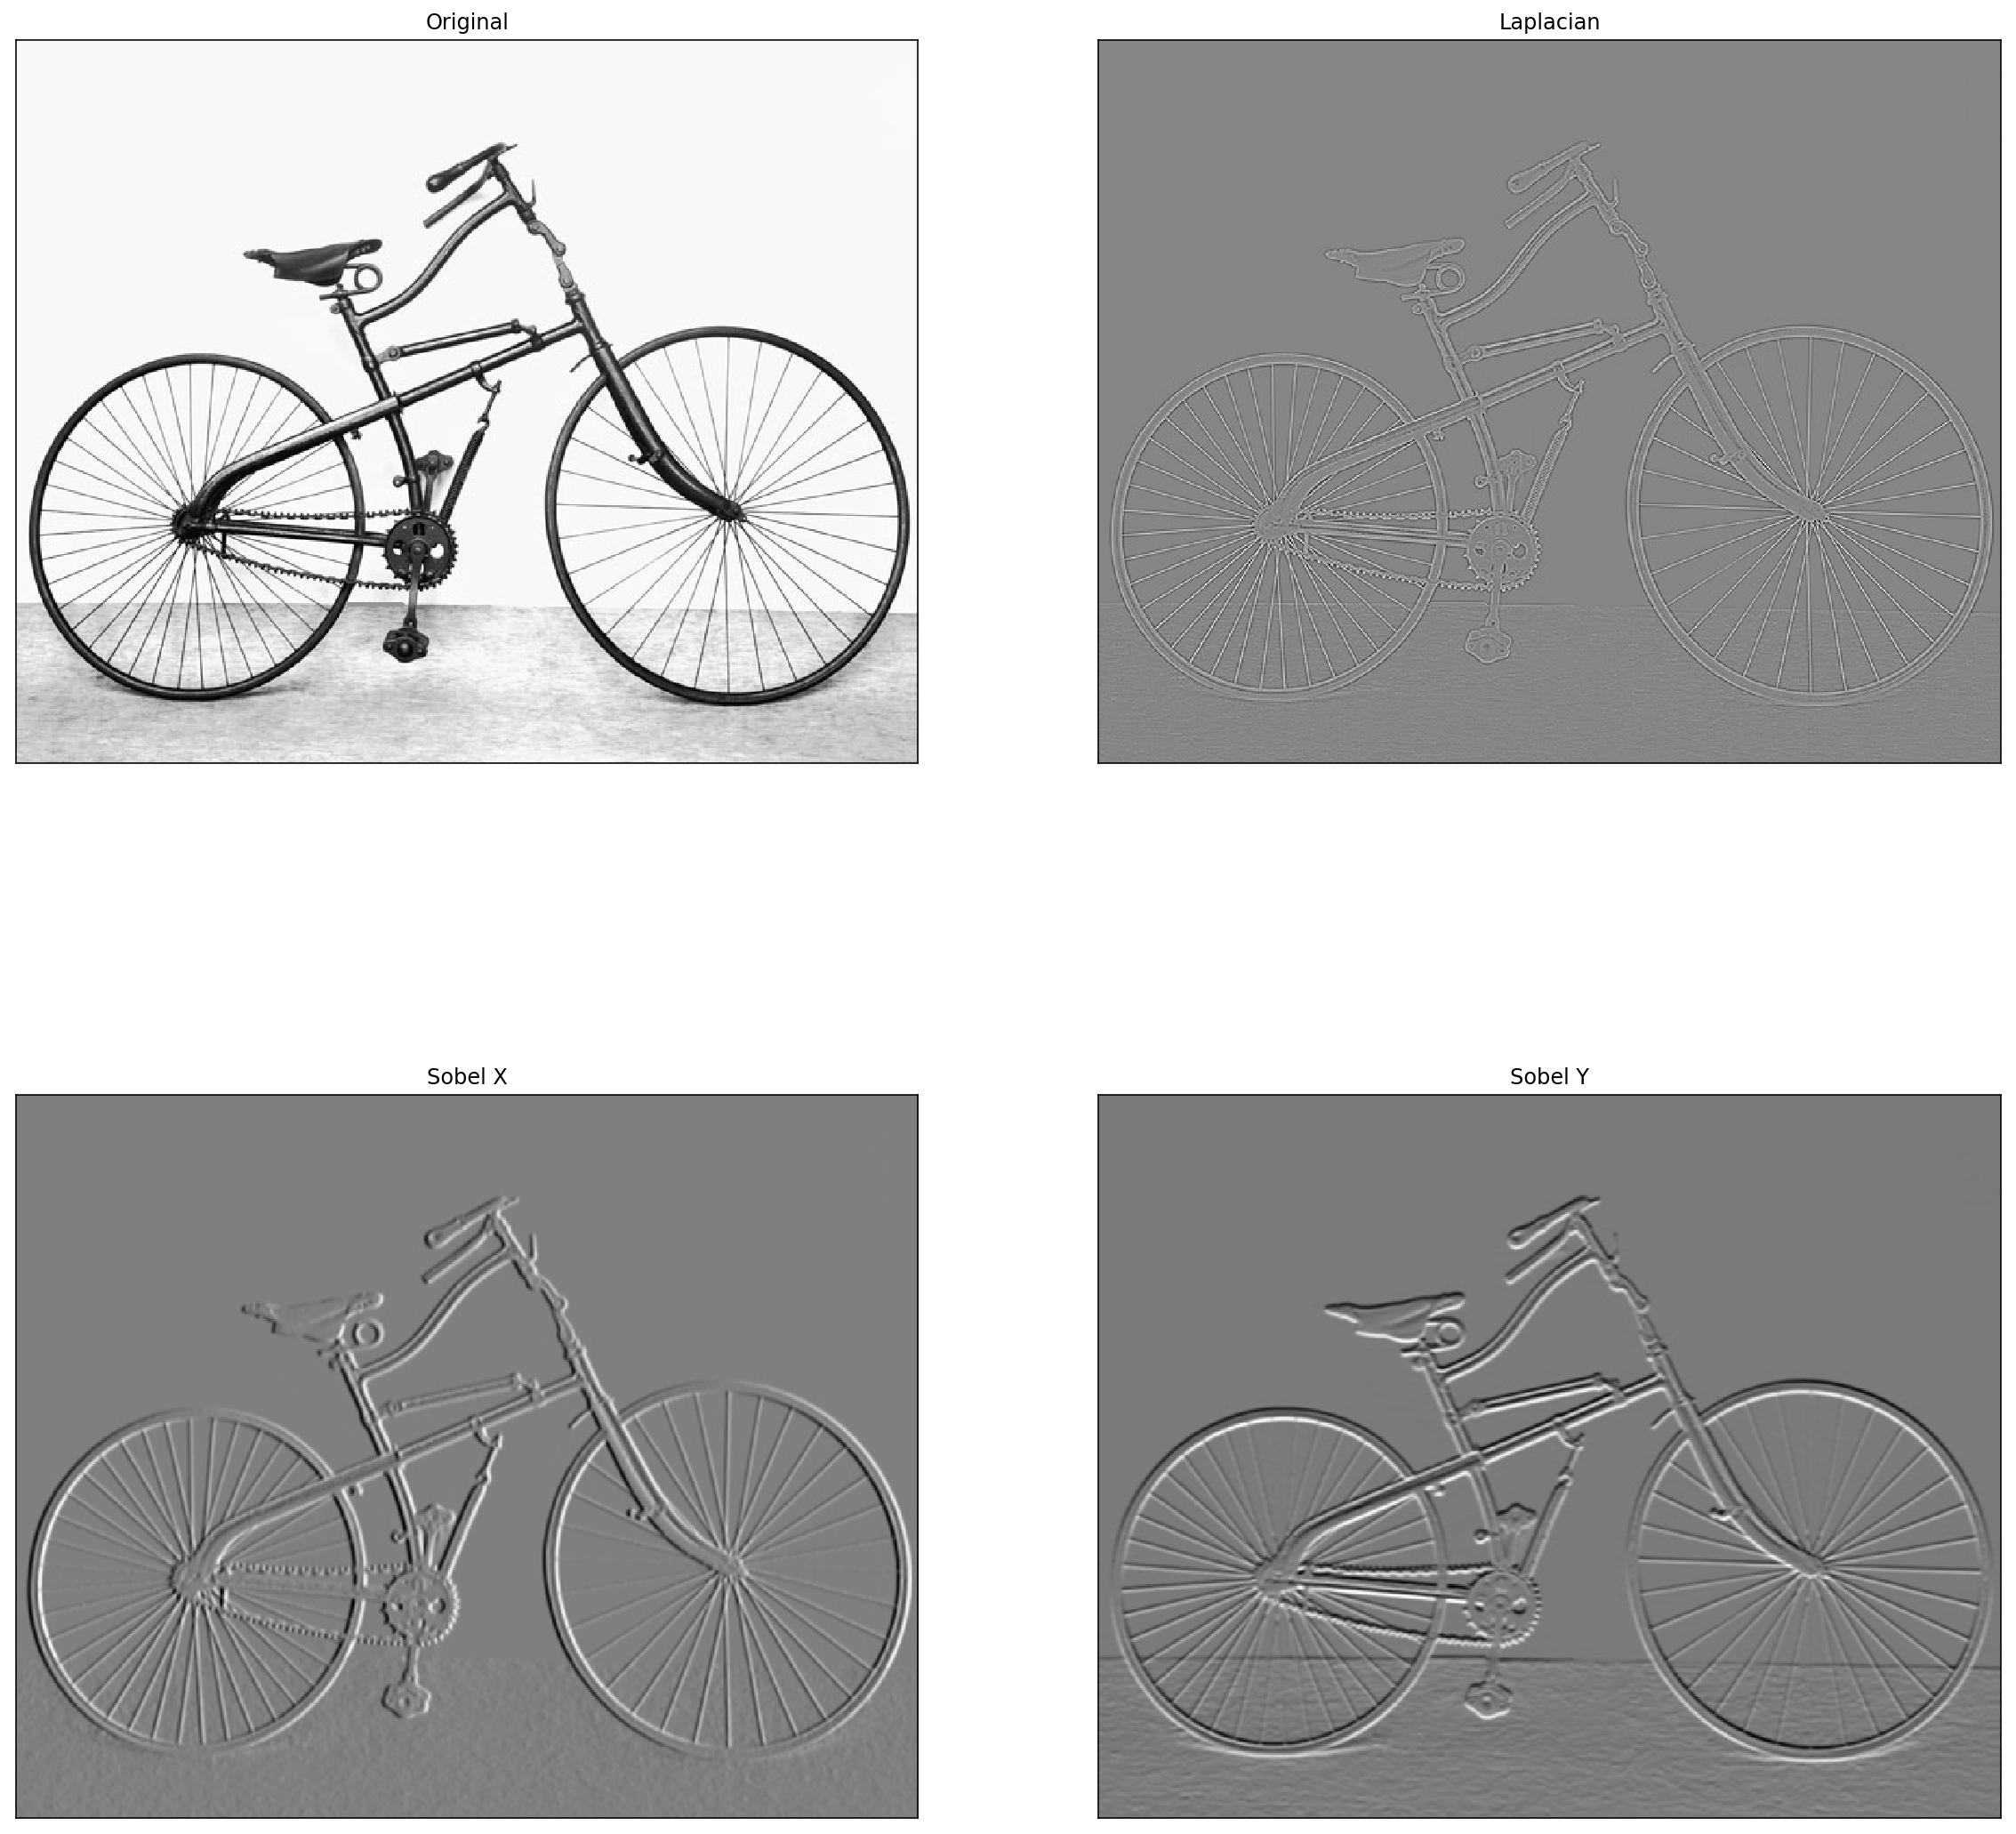

In [323]:
# We demonstrate 
img = cv2.imread('images/bicycle.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

Notice that SobelY brings out the horizontal surface line the best.

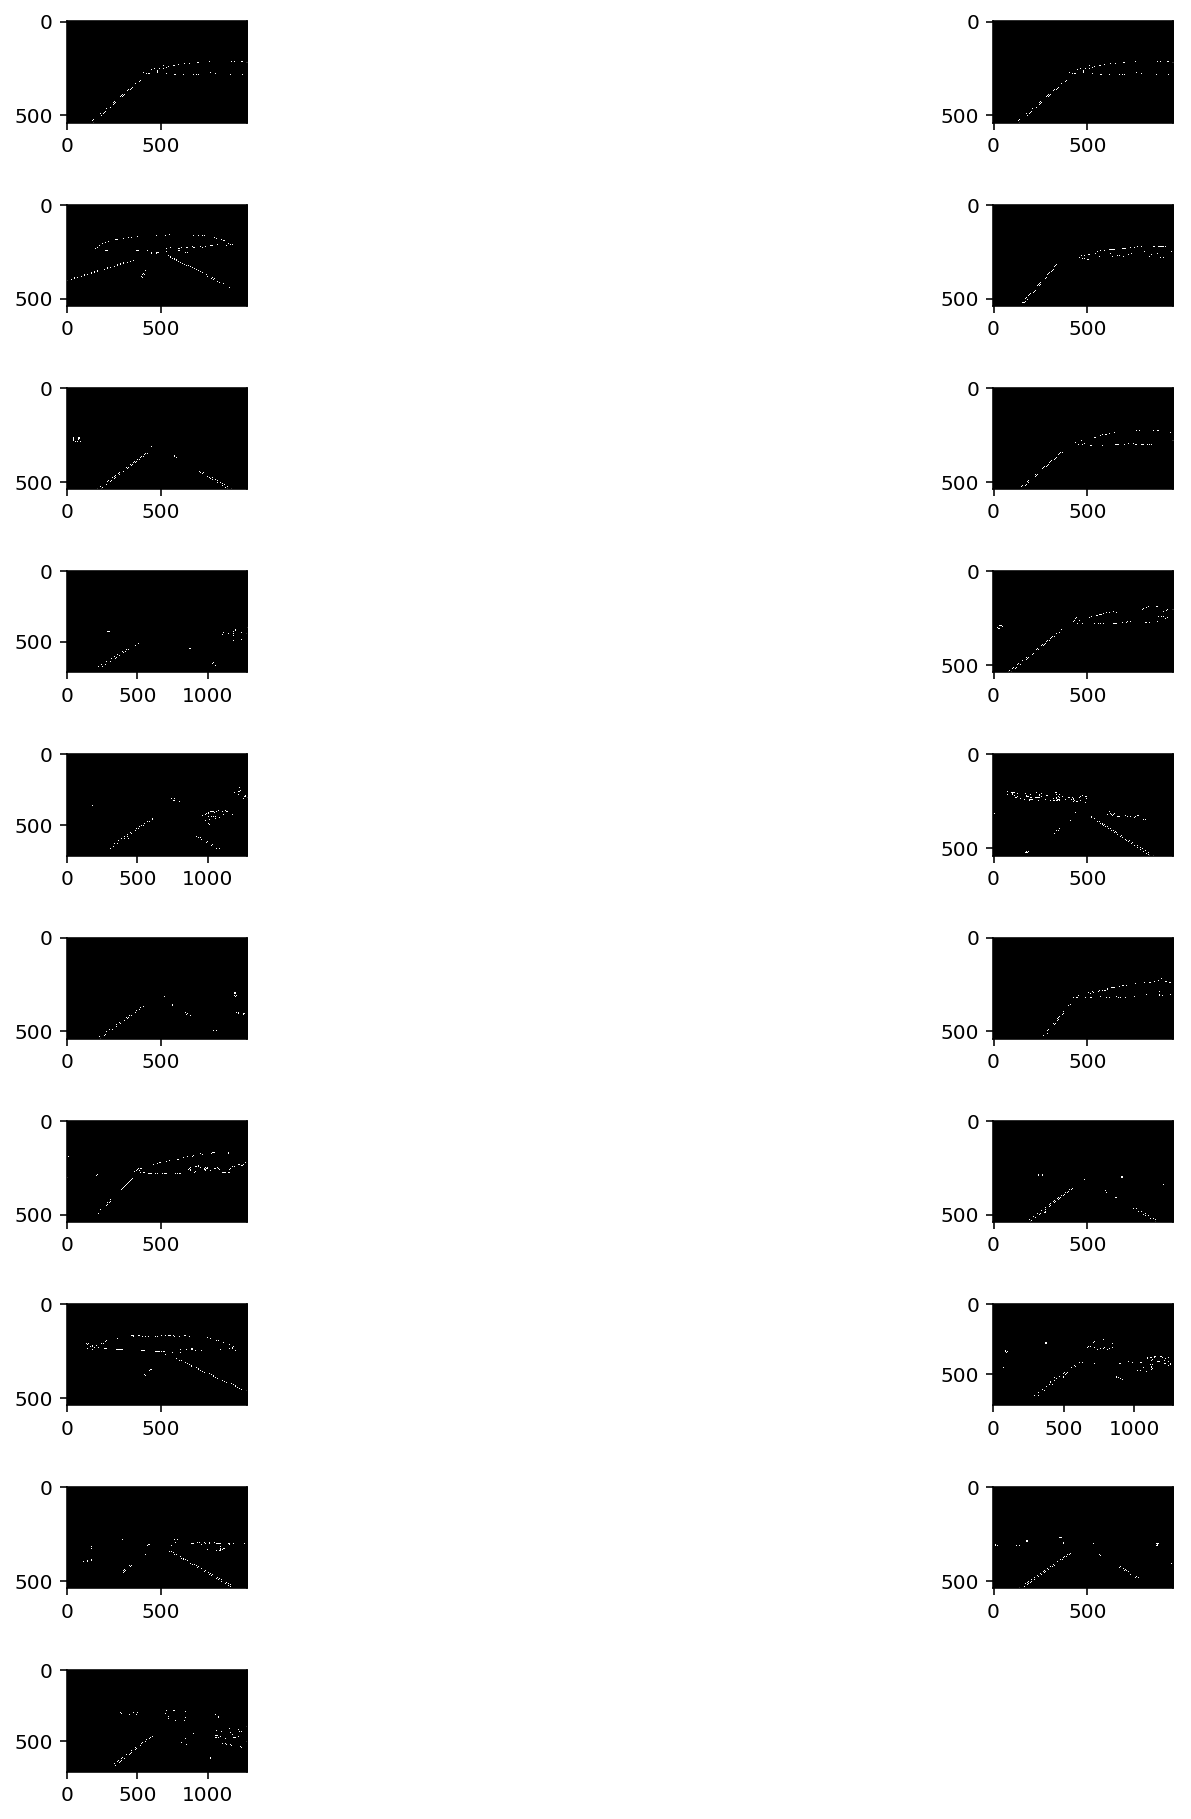

In [324]:
def detect_edges(image, low_threshold=50, high_threshold=150):
    return cv2.Canny(image, low_threshold, high_threshold)

edge_images = list(map(lambda image: detect_edges(image), blurred_images))

show_images(edge_images)

### Filtering a Data by Region of Interest 

Refining the search area will allow us to ignore noise in parts of the images that we are not interesting.

<img src='images/contours.png'/>


We will build a region that look like this. It should encompass only the road.
<img src='images/region-of-interest.png' width='50%'/>

- [cv2.fillPoly OpenCV API Reference](http://docs.opencv.org/modules/core/doc/drawing_functions.html#fillpoly)

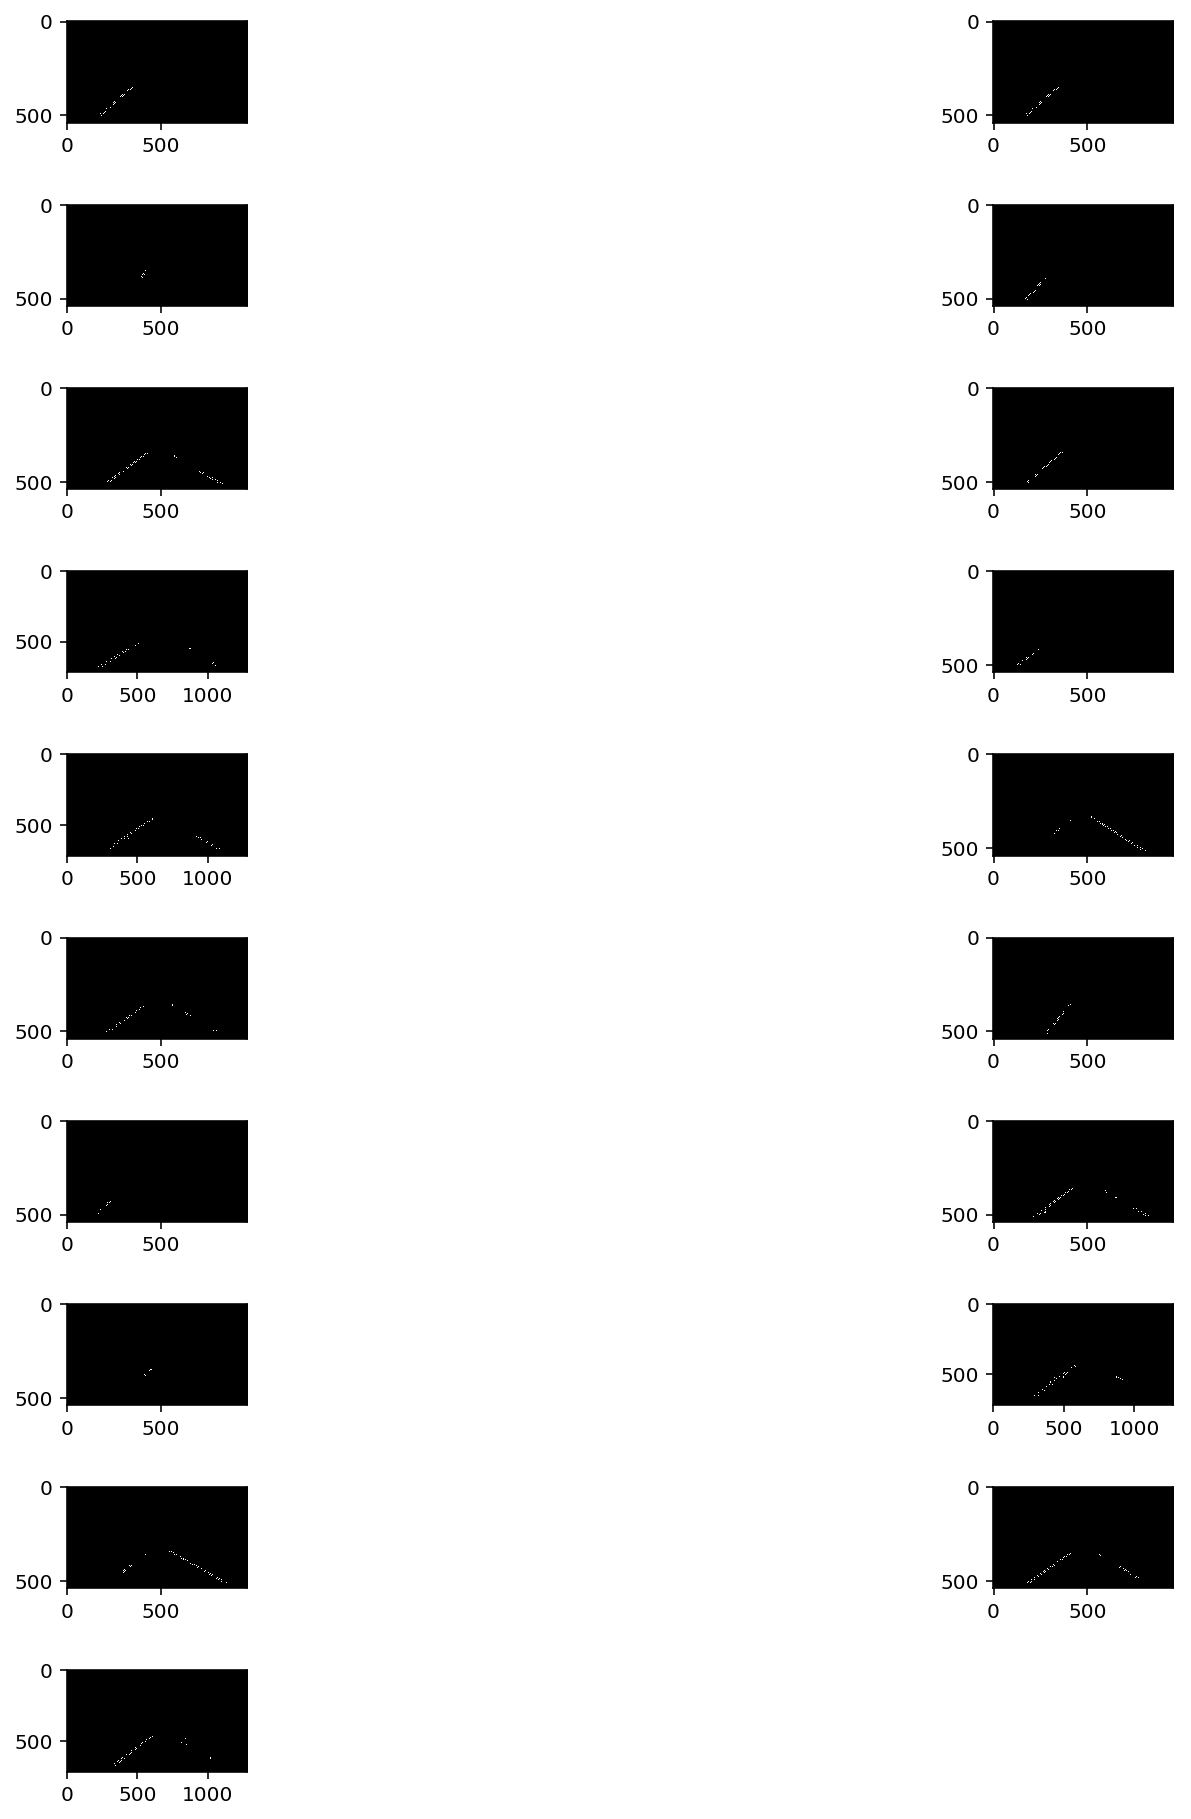

In [325]:
def mask_noise(image, vertices):
    mask = np.zeros_like(image)
    if len(mask.shape)==2:
        cv2.fillPoly(mask, vertices, 255)
    else:
        cv2.fillPoly(mask, vertices, (255,)*mask.shape[2]) # in case, the input image has a channel dimension        
    return cv2.bitwise_and(image, mask)

    
def region_of_interest(image):
    rows, cols = image.shape[:2]
    bottom_left  = [cols*0.1, rows*0.95]
    top_left     = [cols*0.4, rows*0.6]
    bottom_right = [cols*0.9, rows*0.95]
    top_right    = [cols*0.6, rows*0.6] 

    vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    return mask_noise(image, vertices)

roi_images = list(map(region_of_interest, edge_images))

show_images(roi_images)

Now we have lane lines but we need to recognize them as lines.  Especially, two lines: the left lane and the right lane.

## Hough Transform Line Detection

The Hough Transform is a global method for finding straight lines hidden in larger amounts of other data. It is an important technique in image processing. For detecting lines in images, the image is first binarised using some form of thresholding and then the positive instances catalogued in an examples dataset.s

We will use the [cv2.HoughLinesP](http://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html?highlight=houghlinesp#houghlinesp) to detect lines in the edge images.

###### Reference

- [Hough Line Transform OpenCV Theory](http://docs.opencv.org/doc/tutorials/imgproc/imgtrans/hough_lines/hough_lines.html)
- [cv.HoughLinesP OpenCV API Reference](http://docs.opencv.org/modules/imgproc/doc/feature_detection.html?highlight=houghlinesp#houghlinesp)

(<matplotlib.text.Text at 0x7f206ba90b70>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

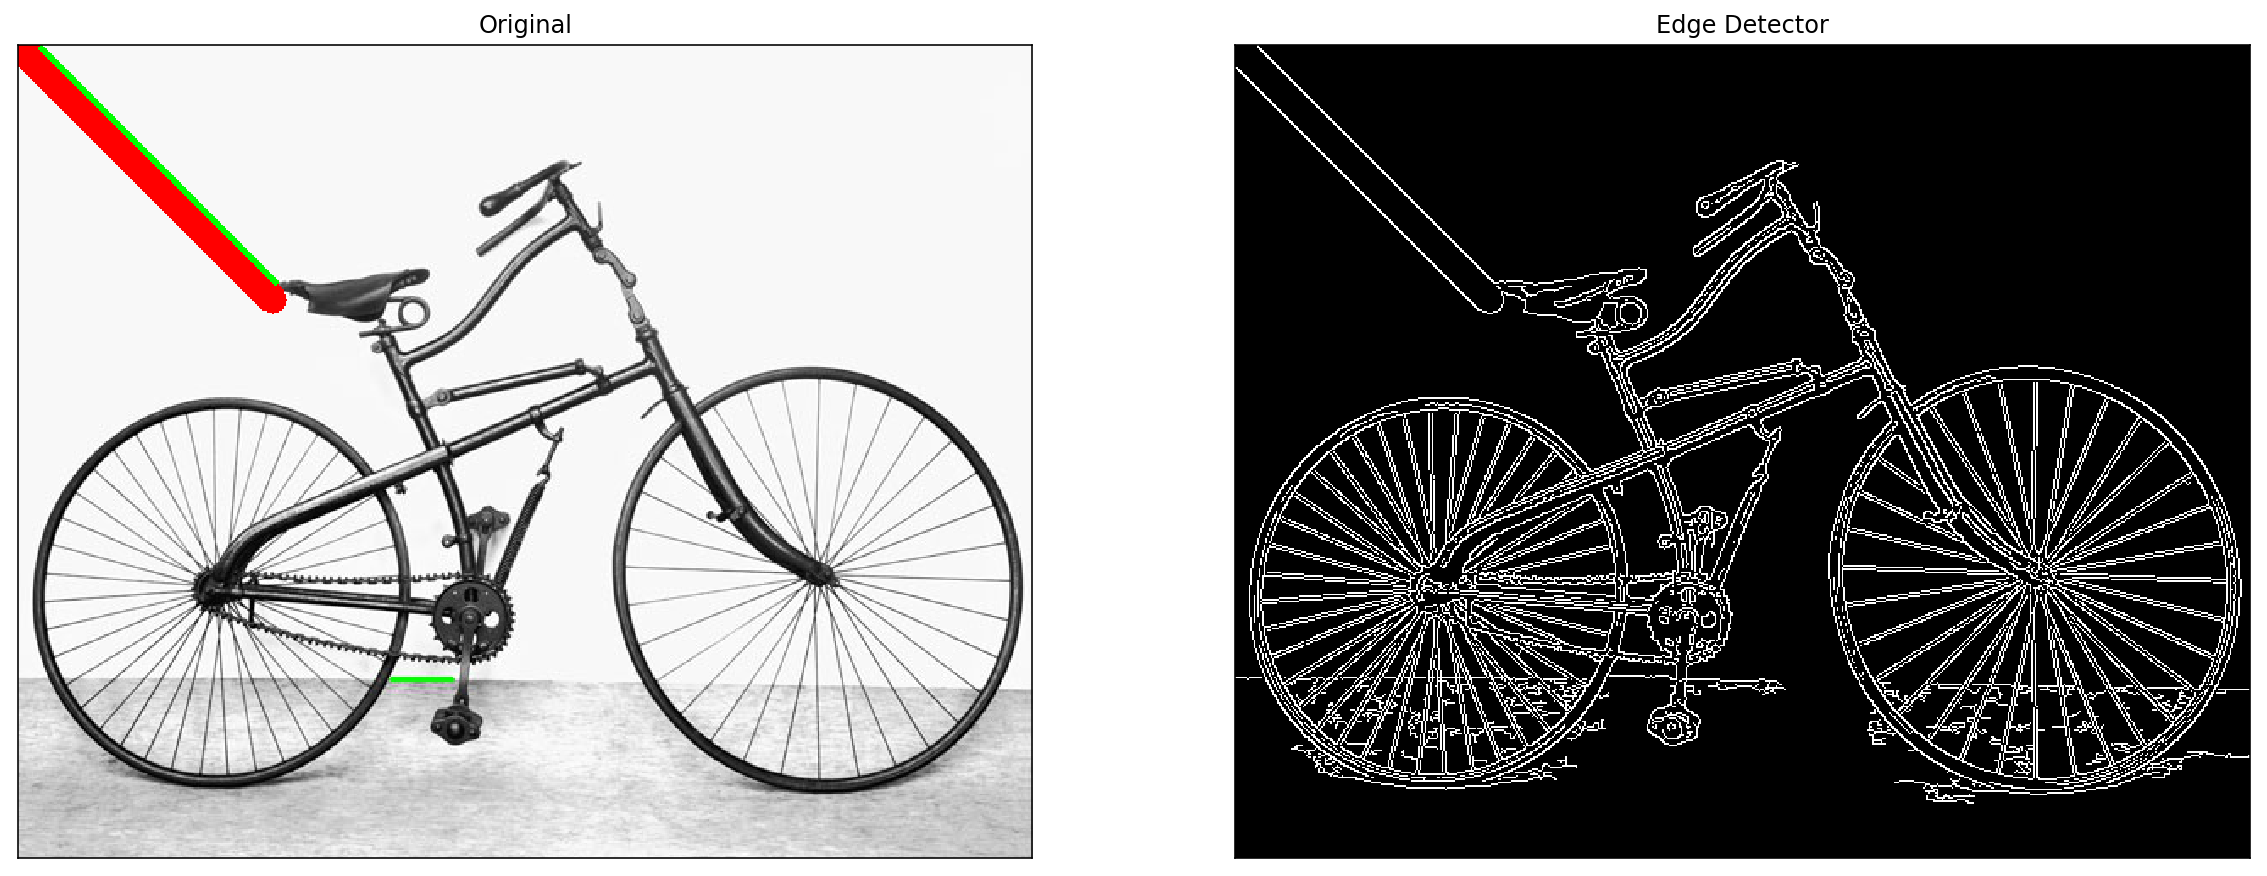

In [326]:
import cv2
import numpy as np

img = cv2.imread('./images/bicycle.jpg',cv2.IMREAD_COLOR)
cv2.line(img,(0,0),(150,150),(255,0,0),15)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,250,apertureSize = 3)
minLineLength = 1000
maxLineGap = 50

lines = cv2.HoughLinesP(edges,3,np.pi/20,100,minLineLength,maxLineGap)

for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.figure(figsize=(20, 20))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Detector'), plt.xticks([]), plt.yticks([])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f206bc95da0>,
 <matplotlib.image.AxesImage at 0x7f2069f82f98>)

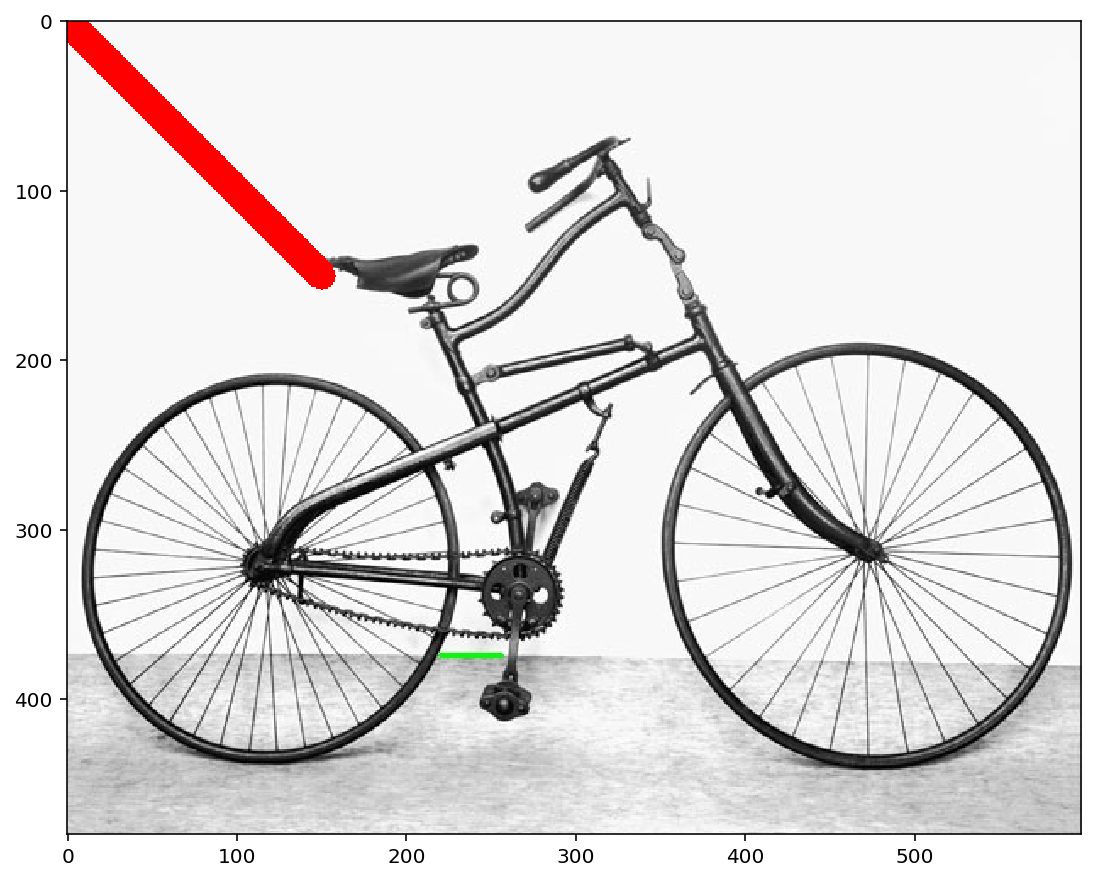

In [327]:
img = plt.imread('./images/bicycle.jpg')
cv2.line(img,(0,0),(150,150),(255,0,0),15)
plt.figure(figsize=(20, 20))
plt.subplot(2,2,1),plt.imshow(img)

In [328]:
def hough_lines(image):
    return cv2.HoughLinesP(image, rho=1, theta=np.pi/180, threshold=20, minLineLength=20, maxLineGap=300)

list_of_lines = list(map(hough_lines, roi_images))

`list_of_lines` contains a list of lines detected.  With the above parameters, approximately 5-15 lines are detected for each image.

Let's draw the lines onto the original images.  

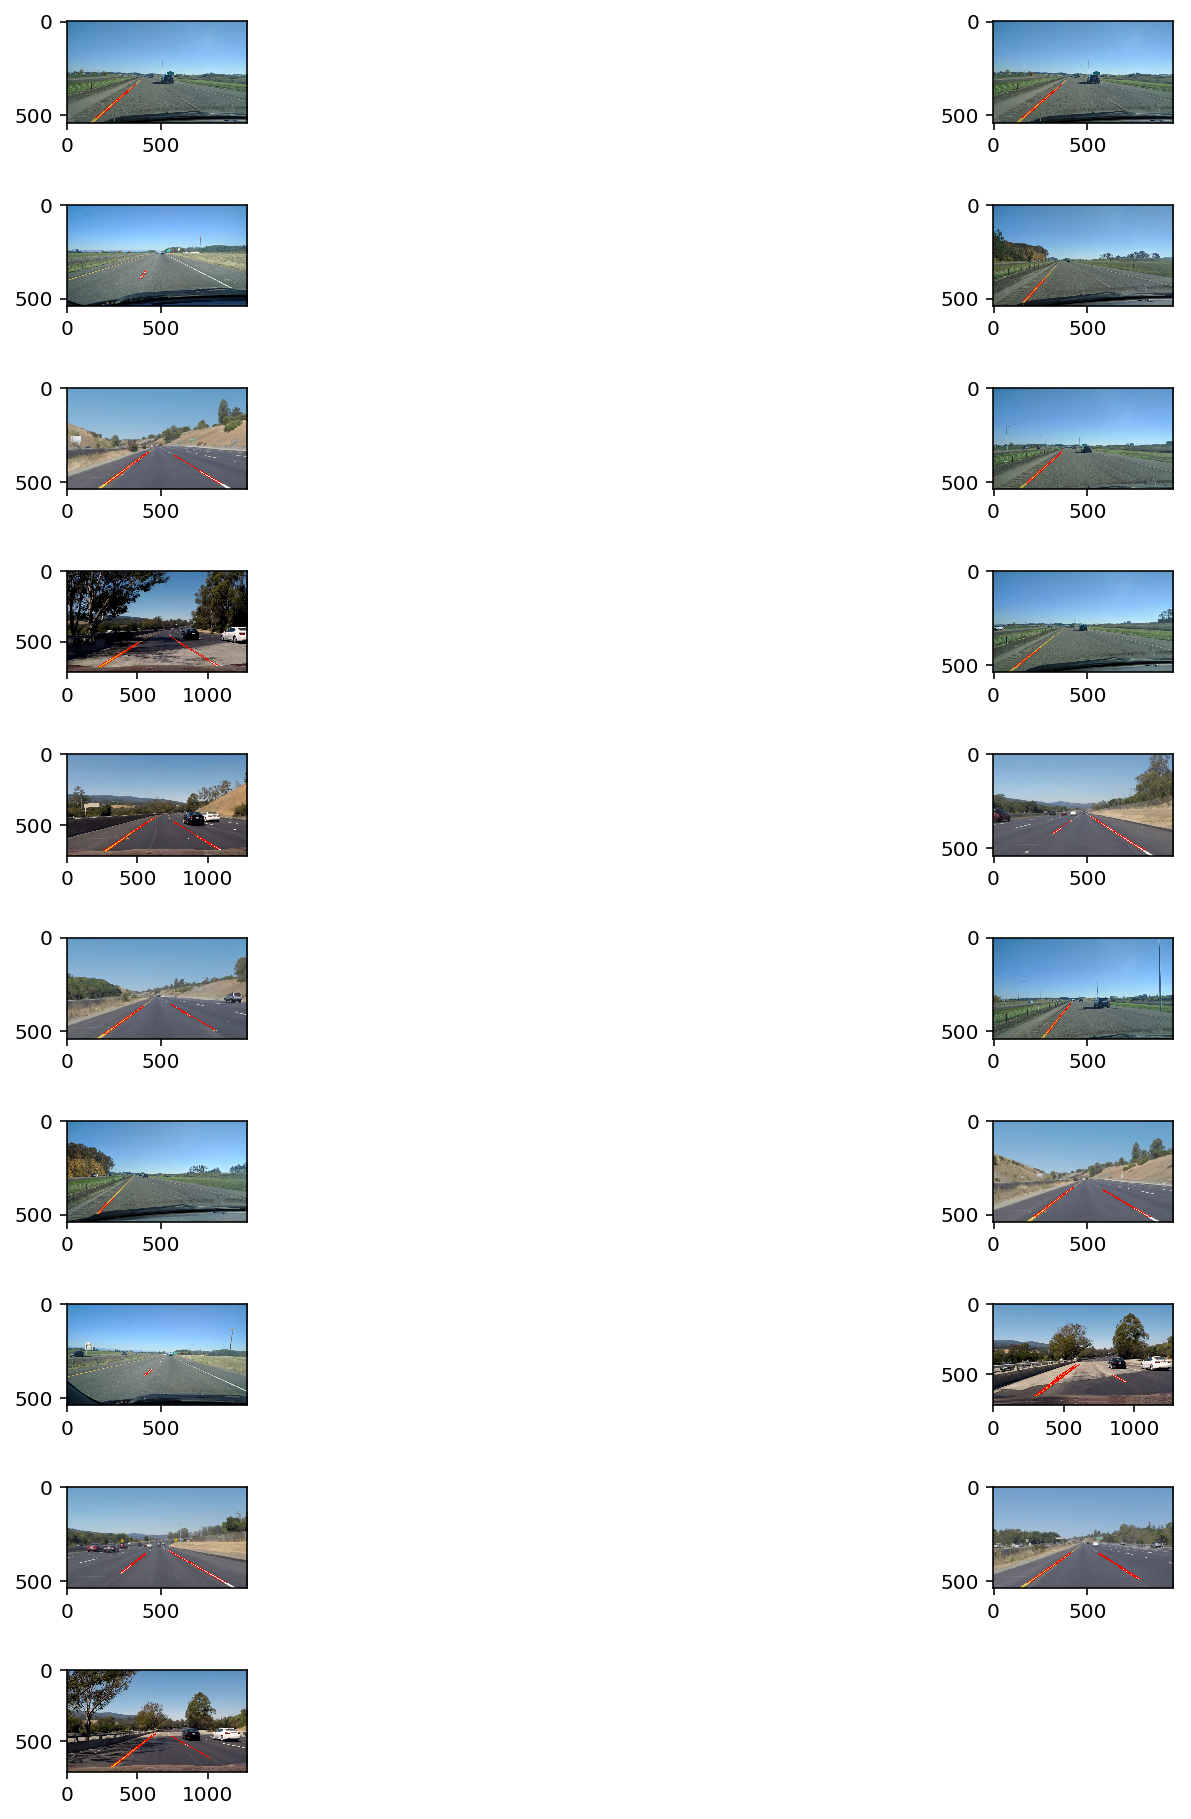

In [329]:
def draw_lines(image, lines, color=[255, 0, 0], thickness=2, make_copy=True):    
    if make_copy:
        image = np.copy(image) 
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(image, (x1, y1), (x2, y2), color, thickness)
    return image


line_images = []
for image, lines in zip(test_images, list_of_lines):
    line_images.append(draw_lines(image, lines))
    
show_images(line_images)

### Averaging and Extrapolating Lines

There are multiple lines detected for a lane line.  We should come up with an averaged line for that.

Also, some lane lines are only partially recognized.  We should extrapolate the line to cover full lane line length.

We want two lane lines: one for the left and the other for the right.  The left lane should have a positive slope, and the right lane should have a negative slope.  Therefore, we'll collect positive slope lines and negative slope lines separately and take averages.

Note: in the image, `y` coordinate is reversed.  The higher `y` value is actually lower in the image.  Therefore, the slope is negative for the left lane, and the slope is positive for the right lane.

In [330]:
def average_slope_intercept(lines):
    left_lines    = [] # (slope, intercept)
    left_weights  = [] # (length,)
    right_lines   = [] # (slope, intercept)
    right_weights = [] # (length,)
    
    # Collect the differently sloped lines into two arrays
    for line in lines:
        for x1, y1, x2, y2 in line:
            if x2==x1:
                continue 
            slope = (y2-y1)/(x2-x1)
            intercept = y1 - slope*x1
            length = np.sqrt((y2-y1)**2+(x2-x1)**2)
            if slope < 0: 
                left_lines.append((slope, intercept))
                left_weights.append((length))
            else:
                right_lines.append((slope, intercept))
                right_weights.append((length))
    
    # add more weight to longer lines    
    left_lane  = np.dot(left_weights,  left_lines) /np.sum(left_weights)  if len(left_weights) >0 else None
    right_lane = np.dot(right_weights, right_lines)/np.sum(right_weights) if len(right_weights)>0 else None
    
    return left_lane, right_lane # (slope, intercept), (slope, intercept)

Using the above `average_lines` function, we can calculate average slope and intercept for the left and right lanes of each image.  

Let's draw the lanes.  I need to convert the slope and intercept into pixel points.

In [331]:
def make_line_points(y1, y2, line):
    """
    Convert a line represented in slope and intercept into pixel points
    """
    if line is None:
        return None
    
    slope, intercept = line
    
    # make sure everything is integer as cv2.line requires it
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    y1 = int(y1)
    y2 = int(y2)
    
    return ((x1, y1), (x2, y2))

Our `draw_lines` except a list of lines as the second parameter.  Each line is a list of 4 values (x1, y1, x2, y2).  The data type needs to be integer for `cv2.line` to work without throwing an error.

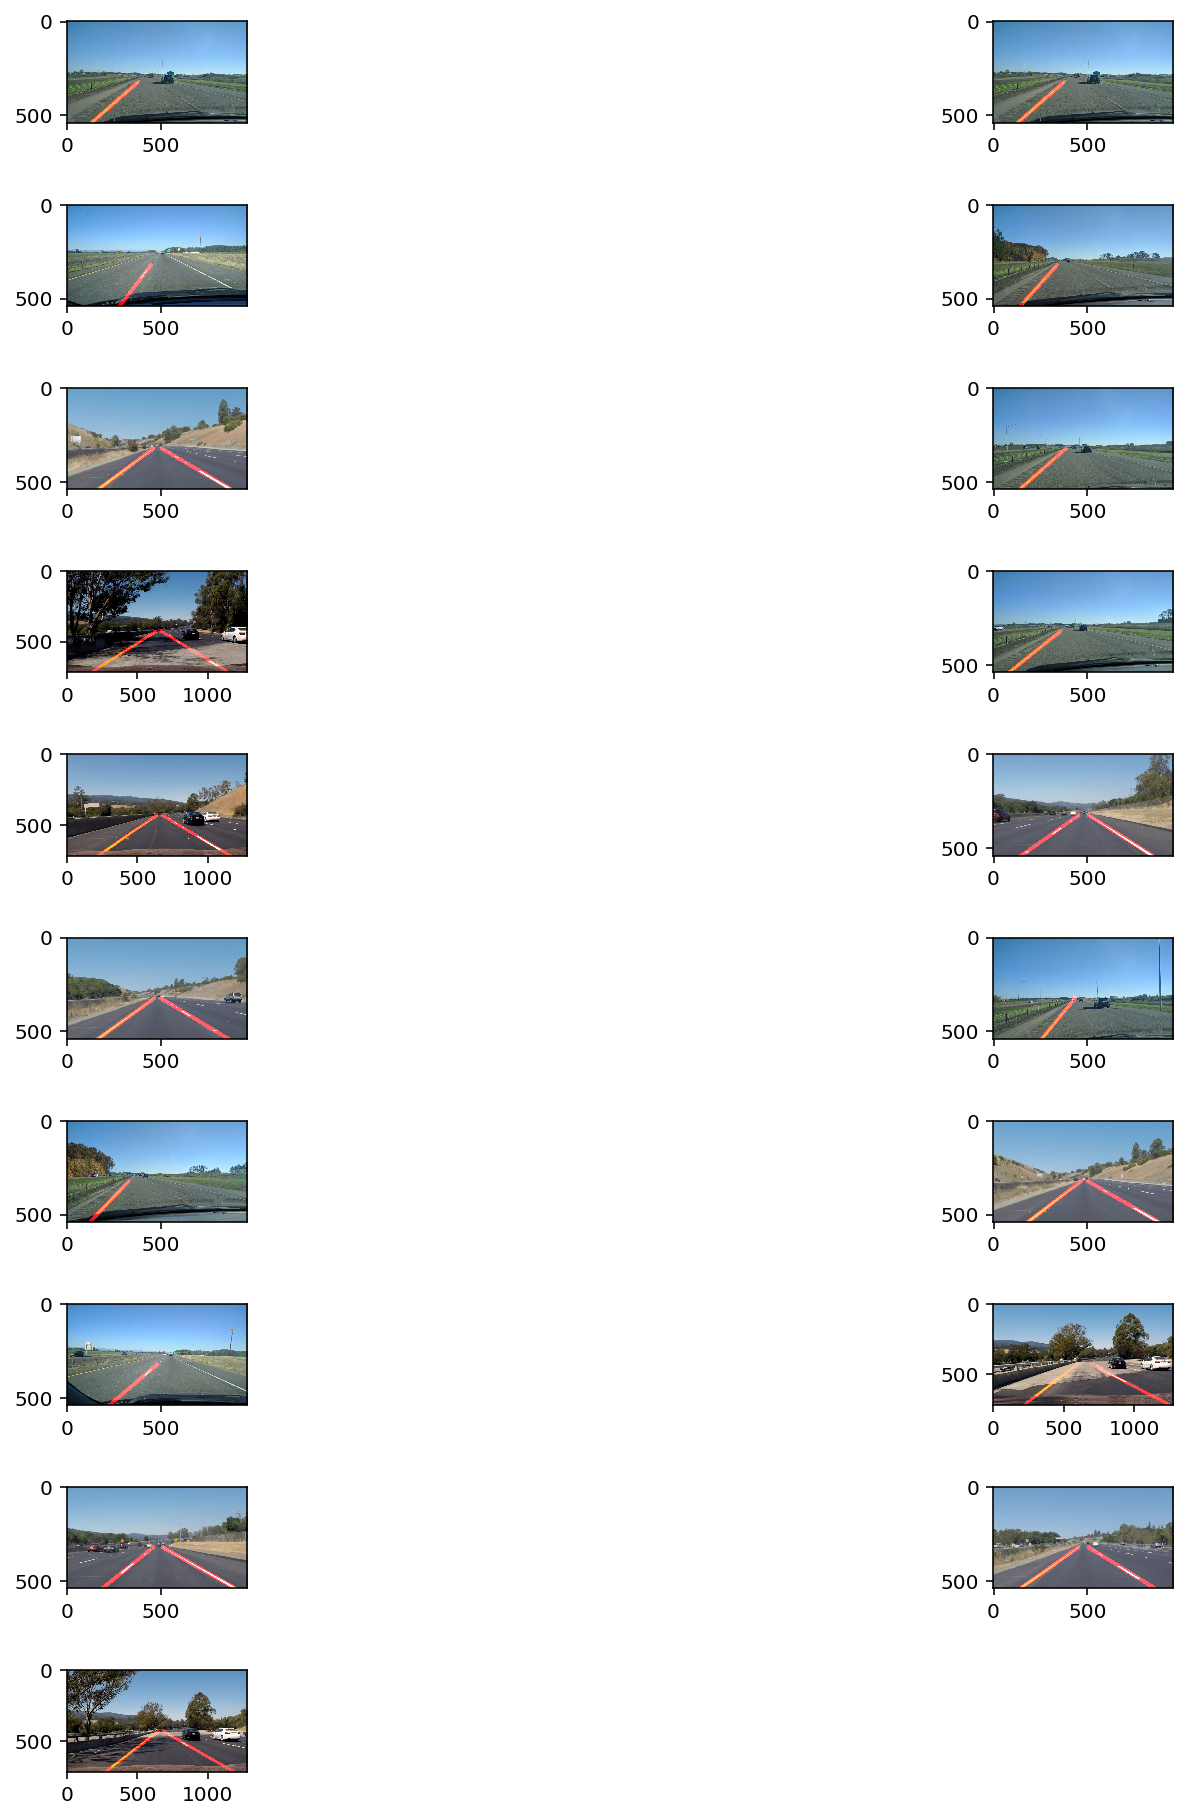

In [332]:
def lane_lines(image, lines):
    left_lane, right_lane = average_slope_intercept(lines)
    
    y1 = image.shape[0] # bottom of the image
    y2 = y1*0.6         # slightly lower than the middle

    left_line  = make_line_points(y1, y2, left_lane)
    right_line = make_line_points(y1, y2, right_lane)
    
    return left_line, right_line

    
def draw_lane_lines(image, lines, color=[255, 0, 0], thickness=20):

    line_image = np.zeros_like(image)
    for line in lines:
        if line is not None:
            cv2.line(line_image, *line,  color, thickness)

    return cv2.addWeighted(image, 1.0, line_image, 0.95, 0.0)
             
    
lane_images = []
for image, lines in zip(test_images, list_of_lines):
    lane_images.append(draw_lane_lines(image, lane_lines(image, lines)))

    
show_images(lane_images)

Let's try the one with the solid white lane on the right first ...

## Conclusion

